In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import seaborn as sns

In [219]:
with open('data/Seasons_Stats_cleansed.csv') as csvfile:
    reader1 = csv.reader(csvfile)
data = pd.read_csv('data/Seasons_Stats_cleansed.csv',sep='\t')

In [220]:
data.head(5)

Unnamed: 0  Unnamed: 0.1  Year               Player Pos  Age   Tm   G  \
0        3218          5010  1978  Kareem Abdul-Jabbar   C   30  LAL  62   
1        3219          5011  1978        Tom Abernethy  SF   23  LAL  73   
2        3220          5012  1978          Alvan Adams   C   23  PHO  70   
3        3221          5013  1978         Lucius Allen  PG   30  KCK  77   
4        3222          5017  1978       Tate Armstrong  SG   22  CHI  66   

       MP       PER   ...         DRB        TRB       AST       STL  \
0  2265.0  0.464106   ...    9.774834  12.731126  4.275497  1.637086   
1  1317.0  0.426424   ...    4.373576   7.243736  2.760820  1.503417   
2  1914.0  0.332915   ...    7.655172  10.626959  4.231975  1.617555   
3  2147.0  0.223009   ...    2.733116   3.839776  6.036330  1.559385   
4   716.0  0.558101   ...    2.212291   3.418994  3.720670  1.156425   

        BLK       TOV        PF        PTS  height  weight  
0  2.940397  3.305960  2.892715  25.430464   218.0   102.0  
1  0.601367  1.366743  3.334852  13.476082   201.0    99.0  
2  1.184953  4.401254  4.551724  20.351097   206.0    95.0  
3  0.469492  3.638565  3.018165  15.426176   188.0    79.0  
4  0.000000  2.916201  2.111732  14.279330   190.0    79.0  

[5 rows x 53 columns]

### Divide the datasets into 5 sets, each is corroesponding to one position

In [221]:
pg = data[data['Pos'] == 'PG']
sg = data[data['Pos'] == 'SG']
sf = data[data['Pos'] == 'SF']
pf = data[data['Pos'] == 'PF']
c = data[data['Pos'] == 'C']

### Each column shows the attribute number across the time for one position 

each dot represent an individual player

    from left to right:
    pg, sg, sf, pf, c

    from top to bottom:
    
    3PA - number of 3-Pointer attempt
    PTS - number of points
    AST - number of assists
    TRB - number of total rebounds
    FTA - number of field-goal attempt
    2PA - number of 2-Pointer attempt

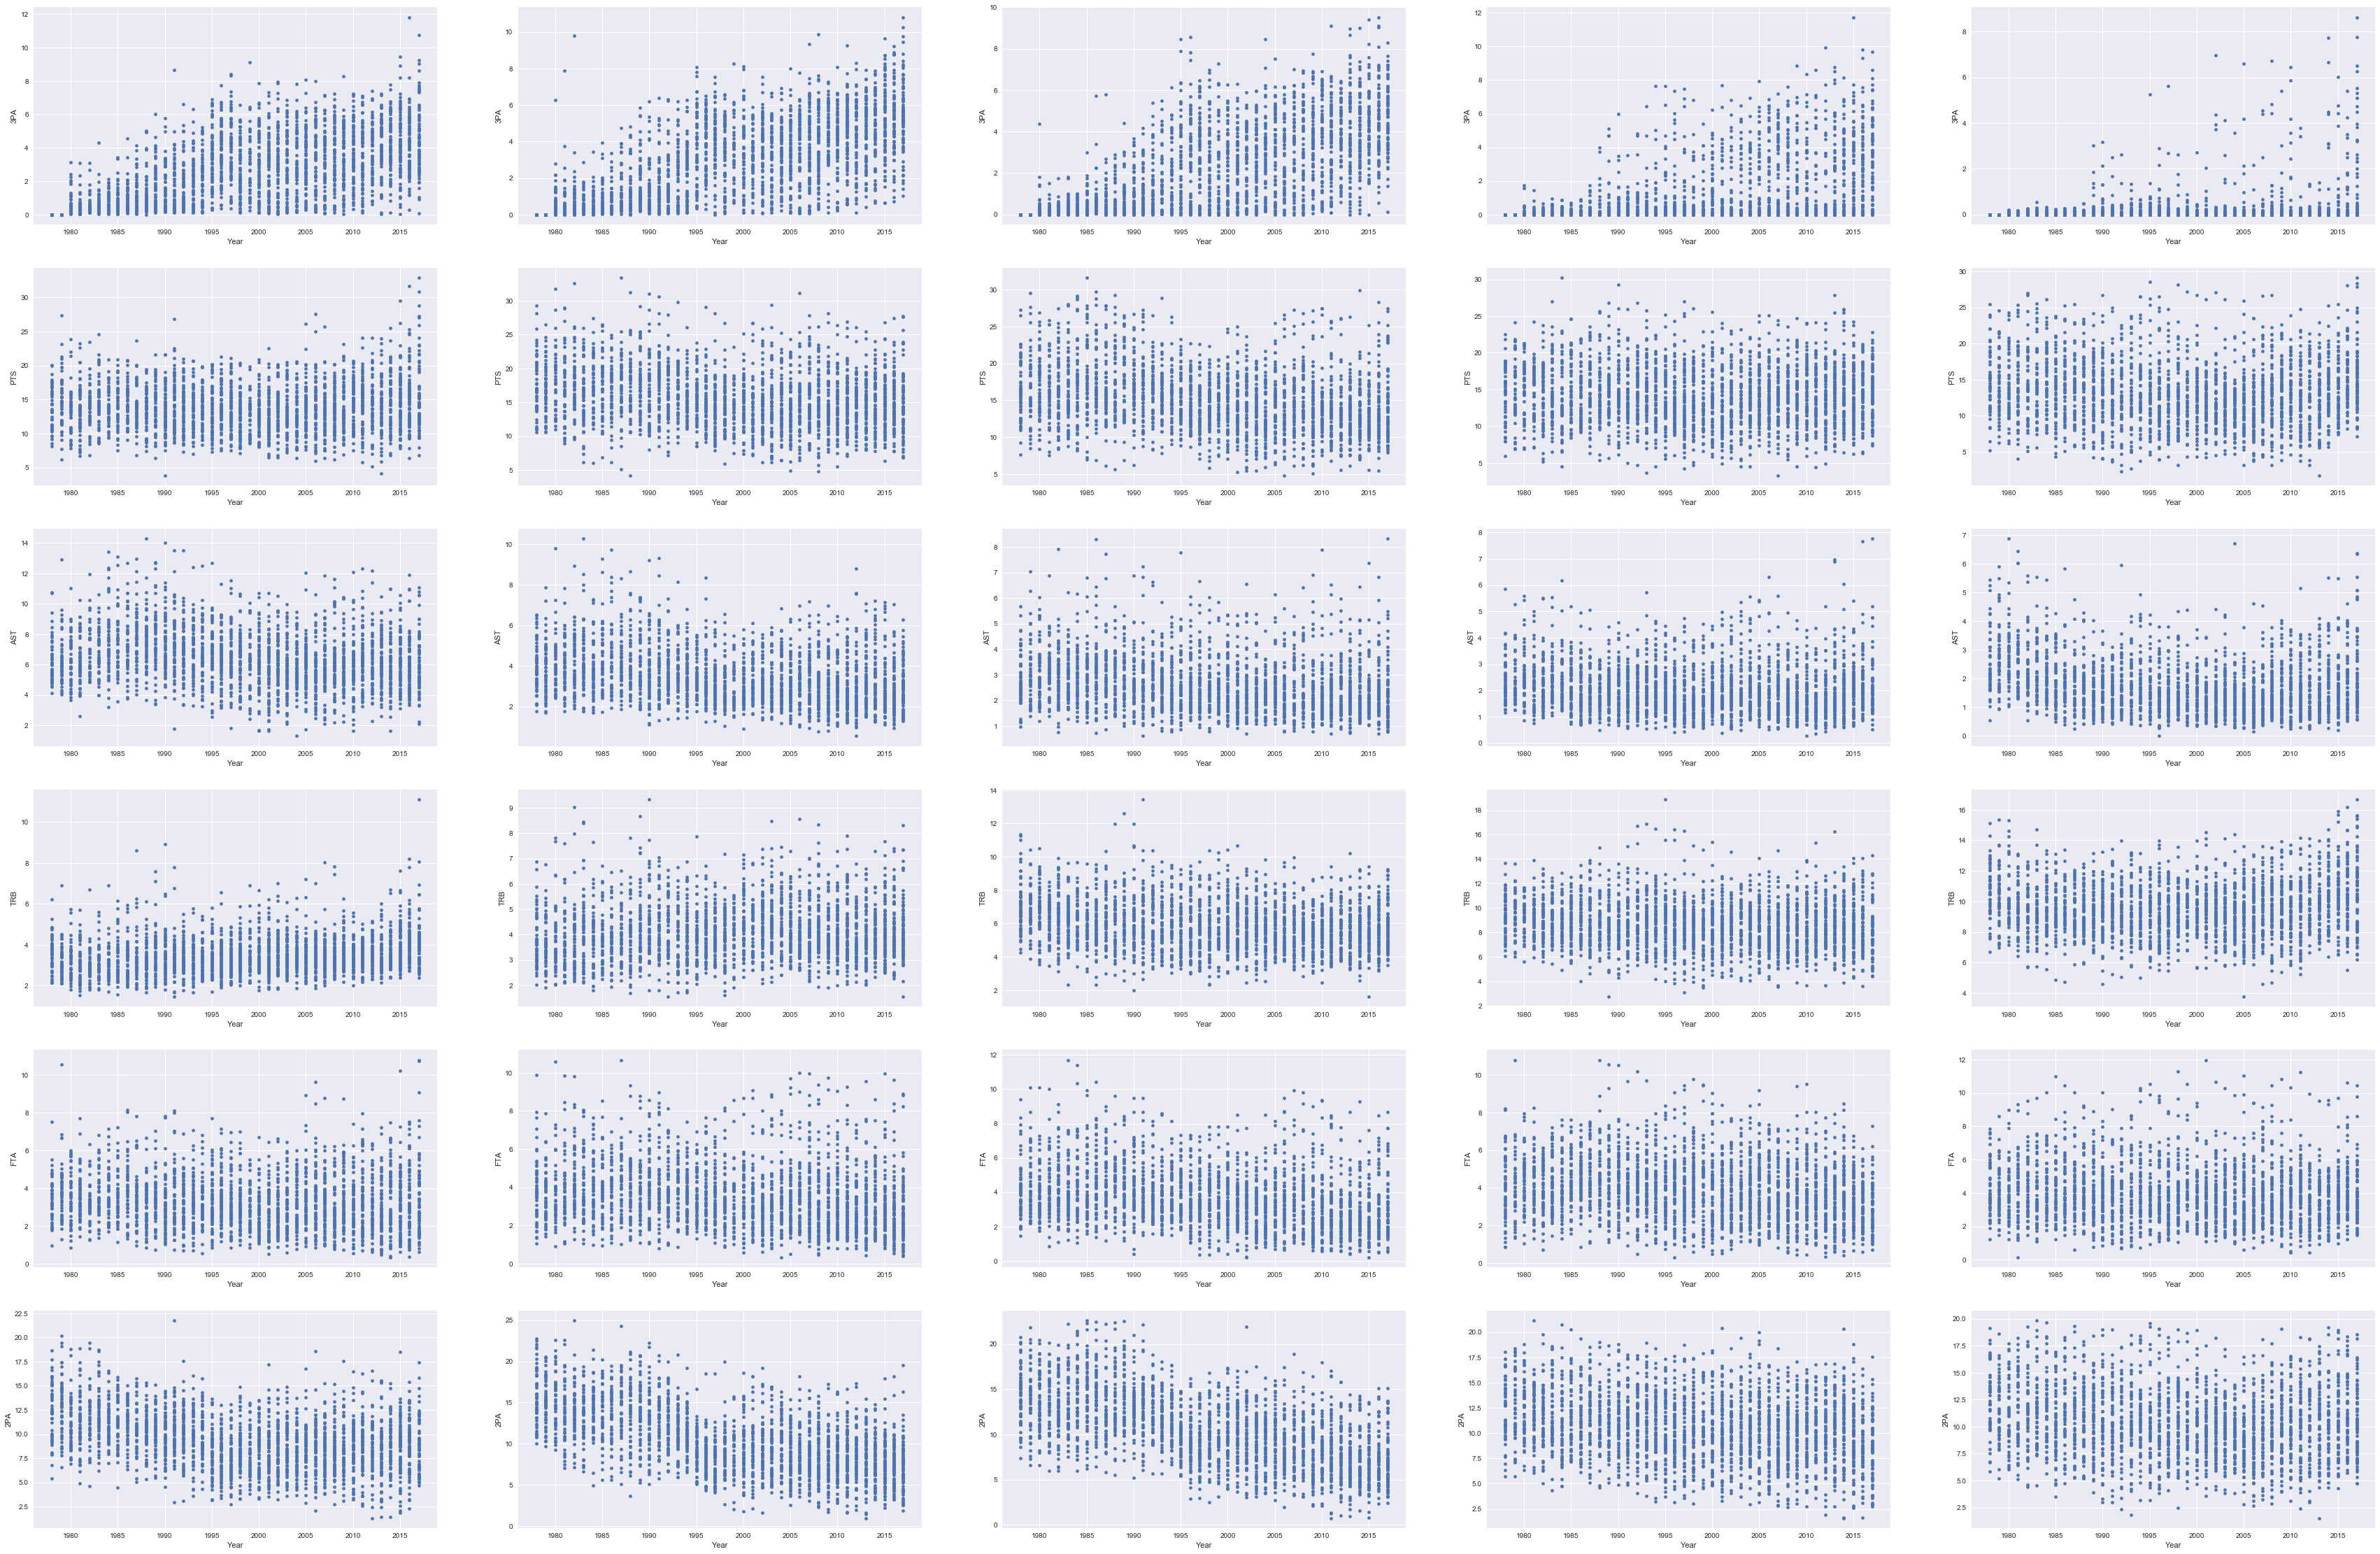

In [222]:
fig, axarr = plt.subplots(6, 5, figsize=(60, 40))
pg.plot(kind='scatter',x='Year',y="FTA",ax=axarr[4][0])
sg.plot(kind='scatter',x='Year',y="FTA",ax=axarr[4][1])
sf.plot(kind='scatter',x='Year',y="FTA",ax=axarr[4][2])
pf.plot(kind='scatter',x='Year',y="FTA",ax=axarr[4][3])
c.plot(kind='scatter',x='Year',y="FTA",ax=axarr[4][4])
pg.plot(kind='scatter',x='Year',y="2PA",ax=axarr[5][0])
sg.plot(kind='scatter',x='Year',y="2PA",ax=axarr[5][1])
sf.plot(kind='scatter',x='Year',y="2PA",ax=axarr[5][2])
pf.plot(kind='scatter',x='Year',y="2PA",ax=axarr[5][3])
c.plot(kind='scatter',x='Year',y="2PA",ax=axarr[5][4])
plt.show()

### Use separate scatter plot and line plot to study certain attribute number across the time for each position

#### 3PA (number of 3-Pointer attempt) of individual player in each position from 1978-2017

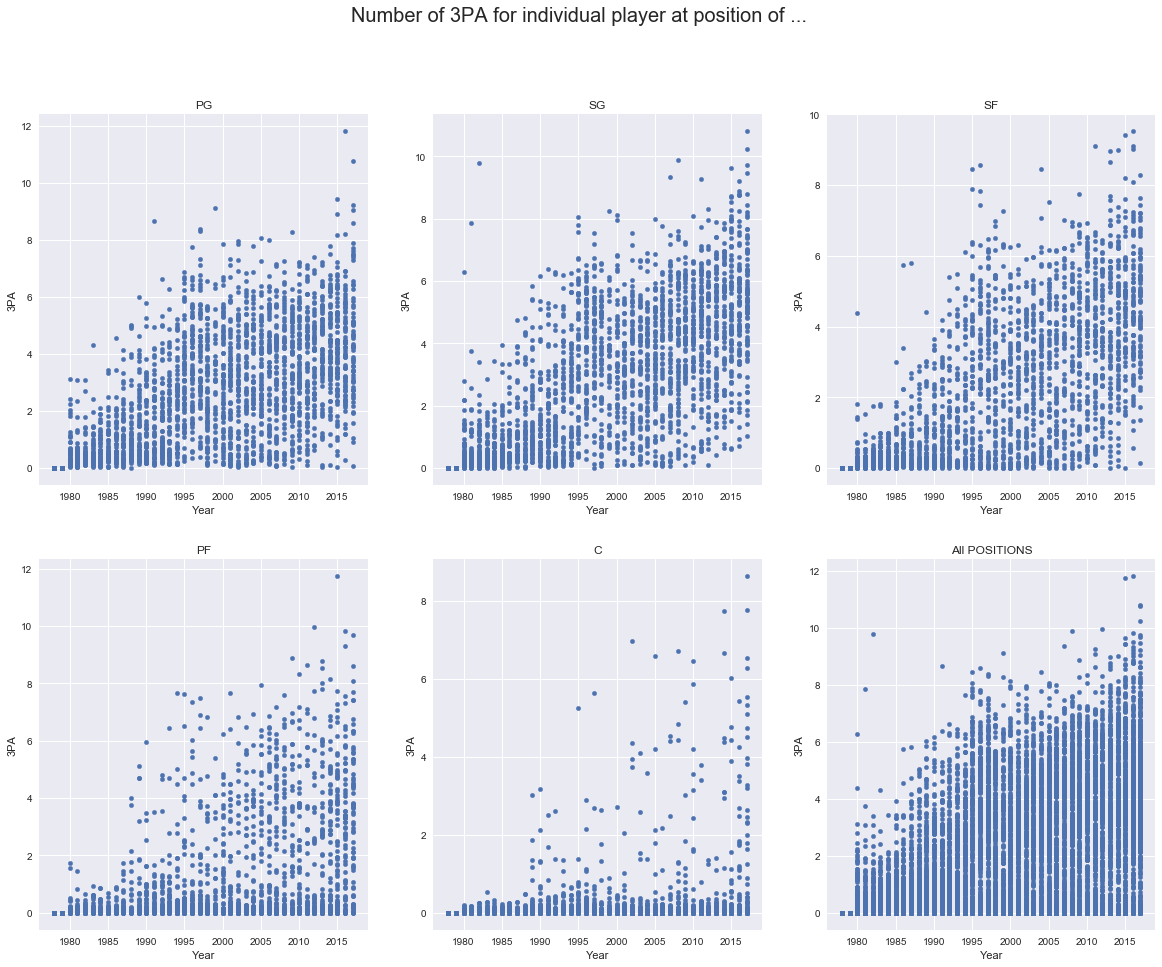

In [270]:
fig, axarr = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Number of 3PA for individual player at position of ...',fontsize=20)
pg.plot(kind='scatter',x='Year',y="3PA",ax=axarr[0][0])
axarr[0, 0].set_title('PG')
sg.plot(kind='scatter',x='Year',y="3PA",ax=axarr[0][1])
axarr[0, 1].set_title('SG')
sf.plot(kind='scatter',x='Year',y="3PA",ax=axarr[0][2])
axarr[0, 2].set_title('SF')
pf.plot(kind='scatter',x='Year',y="3PA",ax=axarr[1][0])
axarr[1, 0].set_title('PF')
c.plot(kind='scatter',x='Year',y="3PA",ax=axarr[1][1])
axarr[1, 1].set_title('C')
data.plot(kind='scatter',x='Year',y="3PA",ax=axarr[1][2])
axarr[1, 2].set_title('All POSITIONS')

PG, SG, C led the trend of increasing 3-pointer attempts.

####  Take the average number of 3-pointer attempts per game of each players in different positions

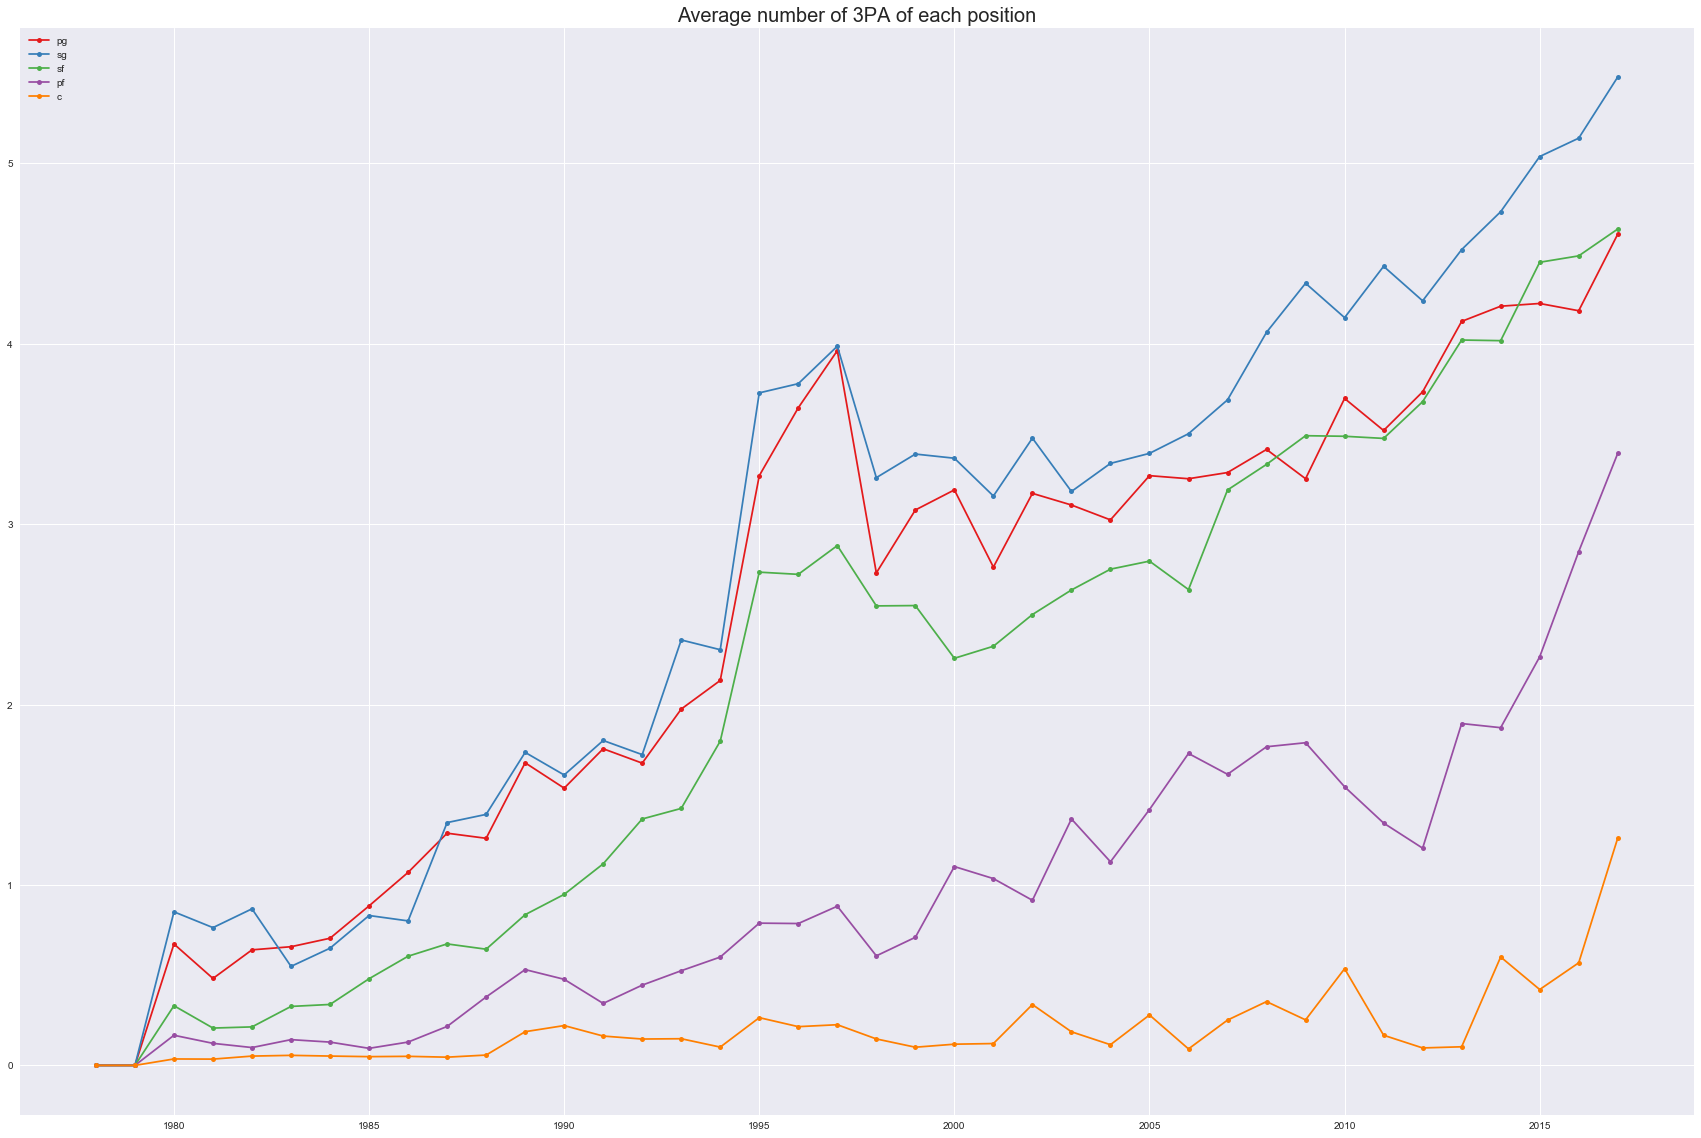

In [281]:
plt.figure(figsize=(30,20))
plt.title('Average number of 3PA of each position',fontsize=20)
bench_by_size = pg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['3PA'],label='pg', linestyle='-', marker='o', markersize=5)

bench_by_size = sg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['3PA'],label='sg', linestyle='-', marker='o', markersize=5)

bench_by_size = sf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['3PA'],label='sf', linestyle='-', marker='o', markersize=5)

bench_by_size = pf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['3PA'],label='pf', linestyle='-', marker='o', markersize=5)

bench_by_size = c.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['3PA'],label='c', linestyle='-', marker='o', markersize=5)
plt.legend(loc='upper left')
plt.show()

Number of 3-pointer attempts increases across all positions, first in PG, SG and SF, and then since 2000 in PF and 2010 in C.

#### AST (number of assists) of individual player in each position from 1978-2017

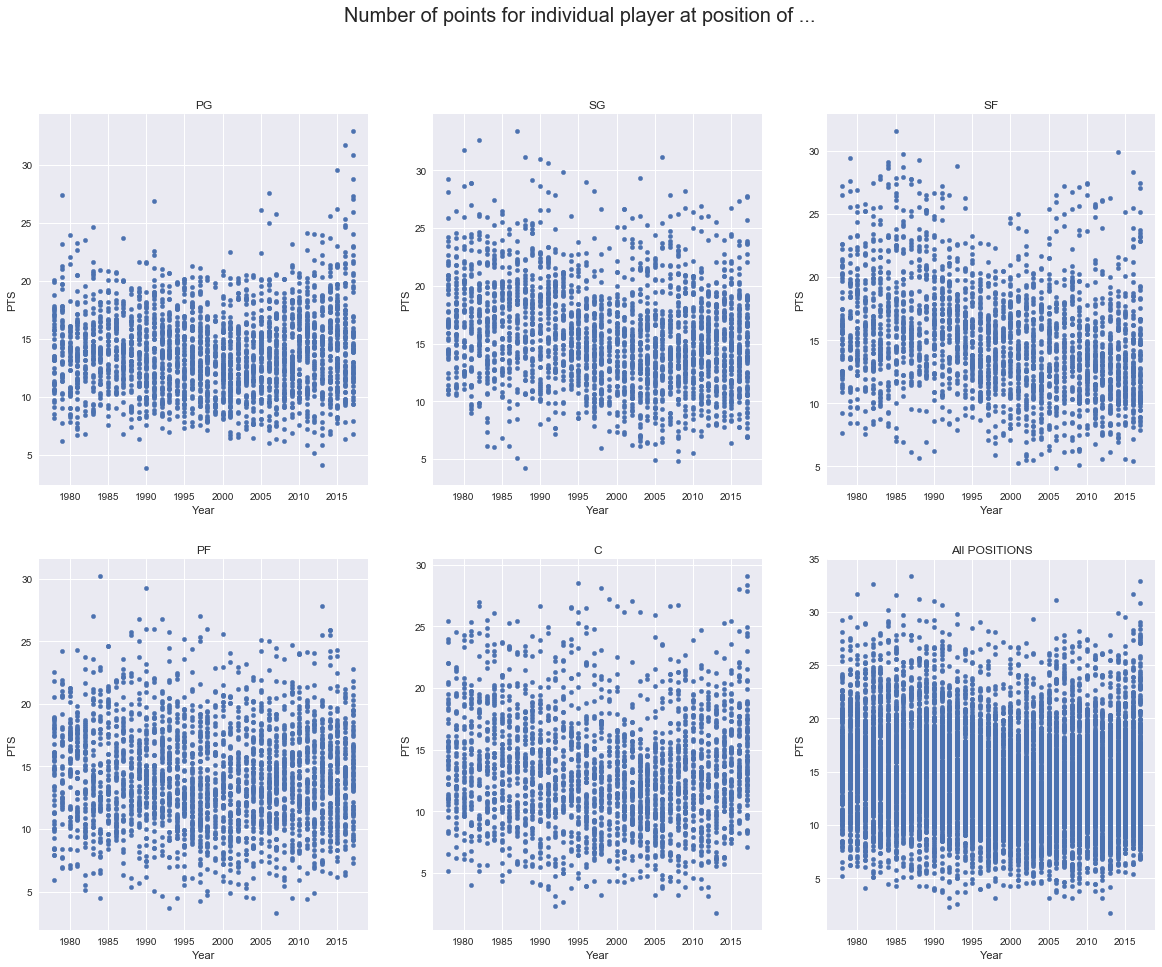

In [279]:
fig, axarr = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Number of points for individual player at position of ...',fontsize=20)
pg.plot(kind='scatter',x='Year',y="PTS",ax=axarr[0][0])
axarr[0, 0].set_title('PG')
sg.plot(kind='scatter',x='Year',y="PTS",ax=axarr[0][1])
axarr[0, 1].set_title('SG')
sf.plot(kind='scatter',x='Year',y="PTS",ax=axarr[0][2])
axarr[0, 2].set_title('SF')
pf.plot(kind='scatter',x='Year',y="PTS",ax=axarr[1][0])
axarr[1, 0].set_title('PF')
c.plot(kind='scatter',x='Year',y="PTS",ax=axarr[1][1])
axarr[1, 1].set_title('C')
data.plot(kind='scatter',x='Year',y="PTS",ax=axarr[1][2])
axarr[1, 2].set_title('All POSITIONS')

Number of points decreases in SG and SF, in other positions stays around the same.

###  Take the average number of points per game of each players in different positions

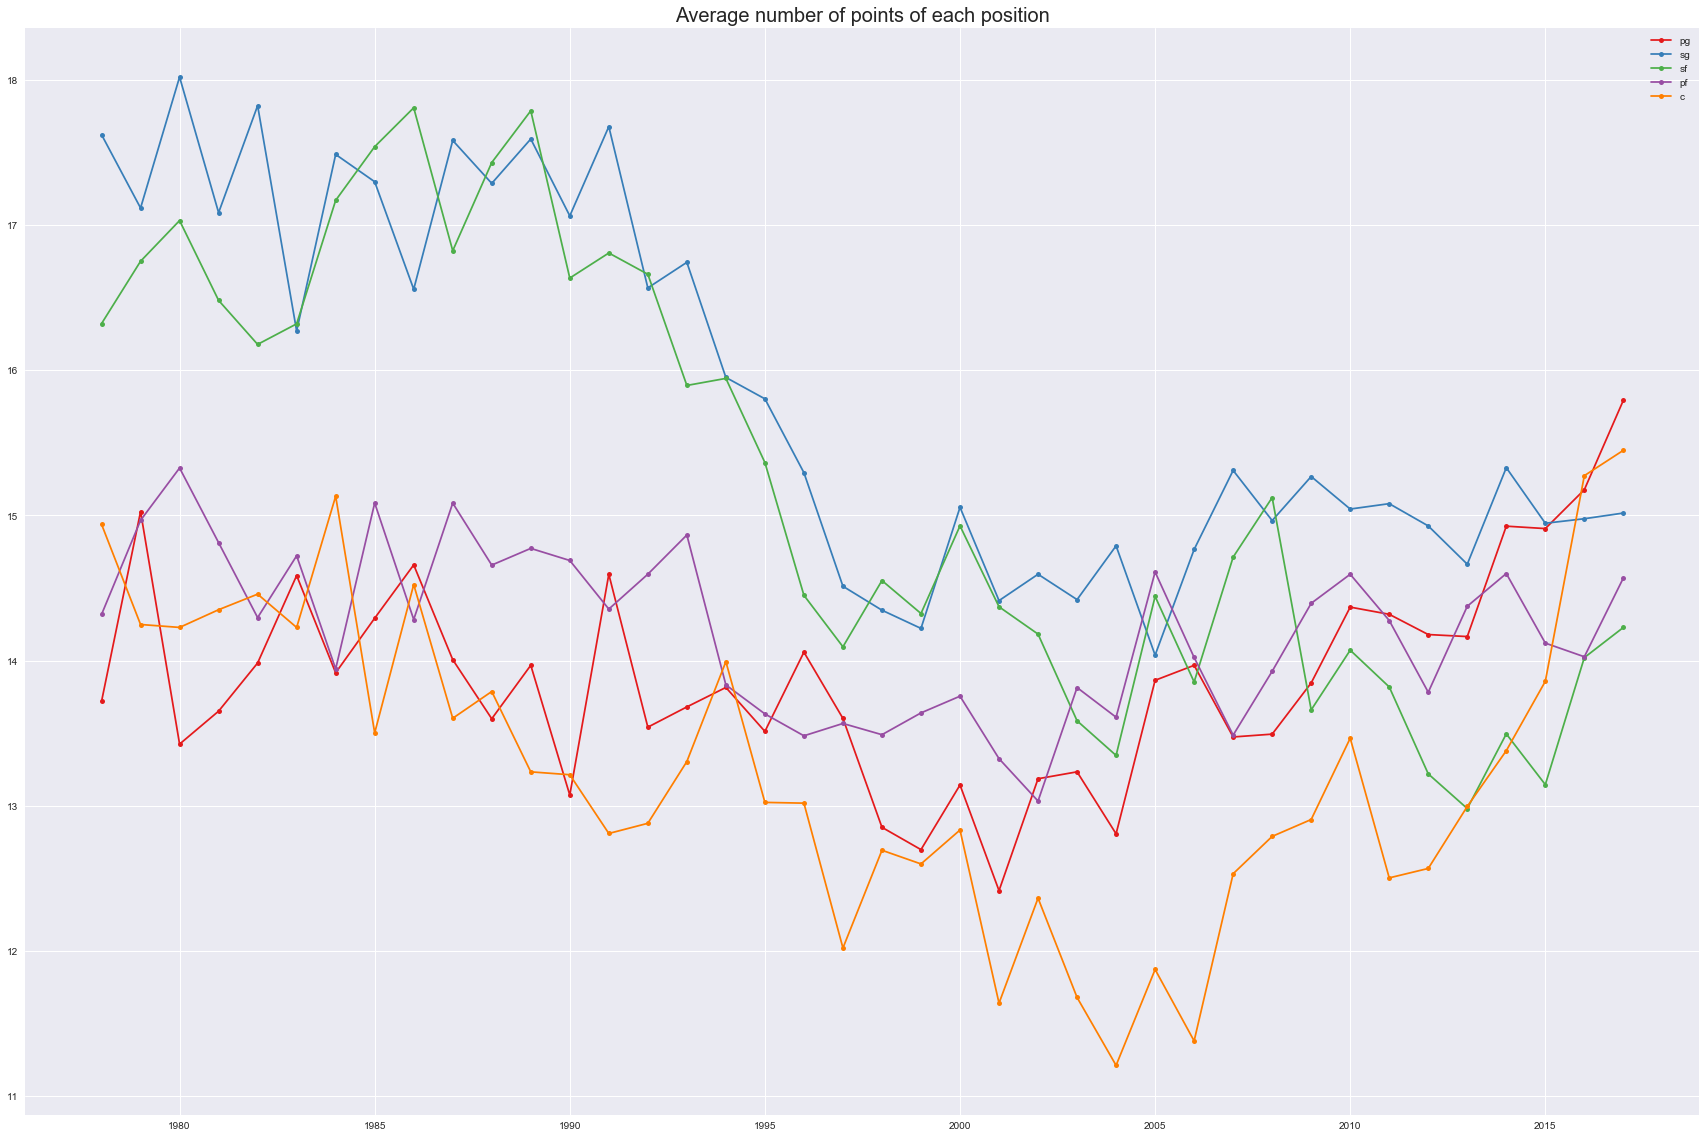

In [282]:
plt.figure(figsize=(30,20))
plt.title('Average number of points of each position',fontsize=20)
bench_by_size = pg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['PTS'],label='pg', linestyle='-', marker='o', markersize=5)
bench_by_size = sg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['PTS'],label='sg', linestyle='-', marker='o', markersize=5)
plt.legend(loc='upper right')
bench_by_size = sf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['PTS'],label='sf', linestyle='-', marker='o', markersize=5)
plt.legend(loc='upper right')
bench_by_size = pf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['PTS'],label='pf', linestyle='-', marker='o', markersize=5)
plt.legend(loc='upper right')
bench_by_size = c.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['PTS'],label='c', linestyle='-', marker='o', markersize=5)
plt.legend(loc='upper right')
plt.show()

we observe a drastic decrease in number until 1997, especially in the position of SG and SF, and the number has remain same, and significant increase happens in PG and C after 2000.

#### AST (number of assists) of individual player in each position from 1978-2017

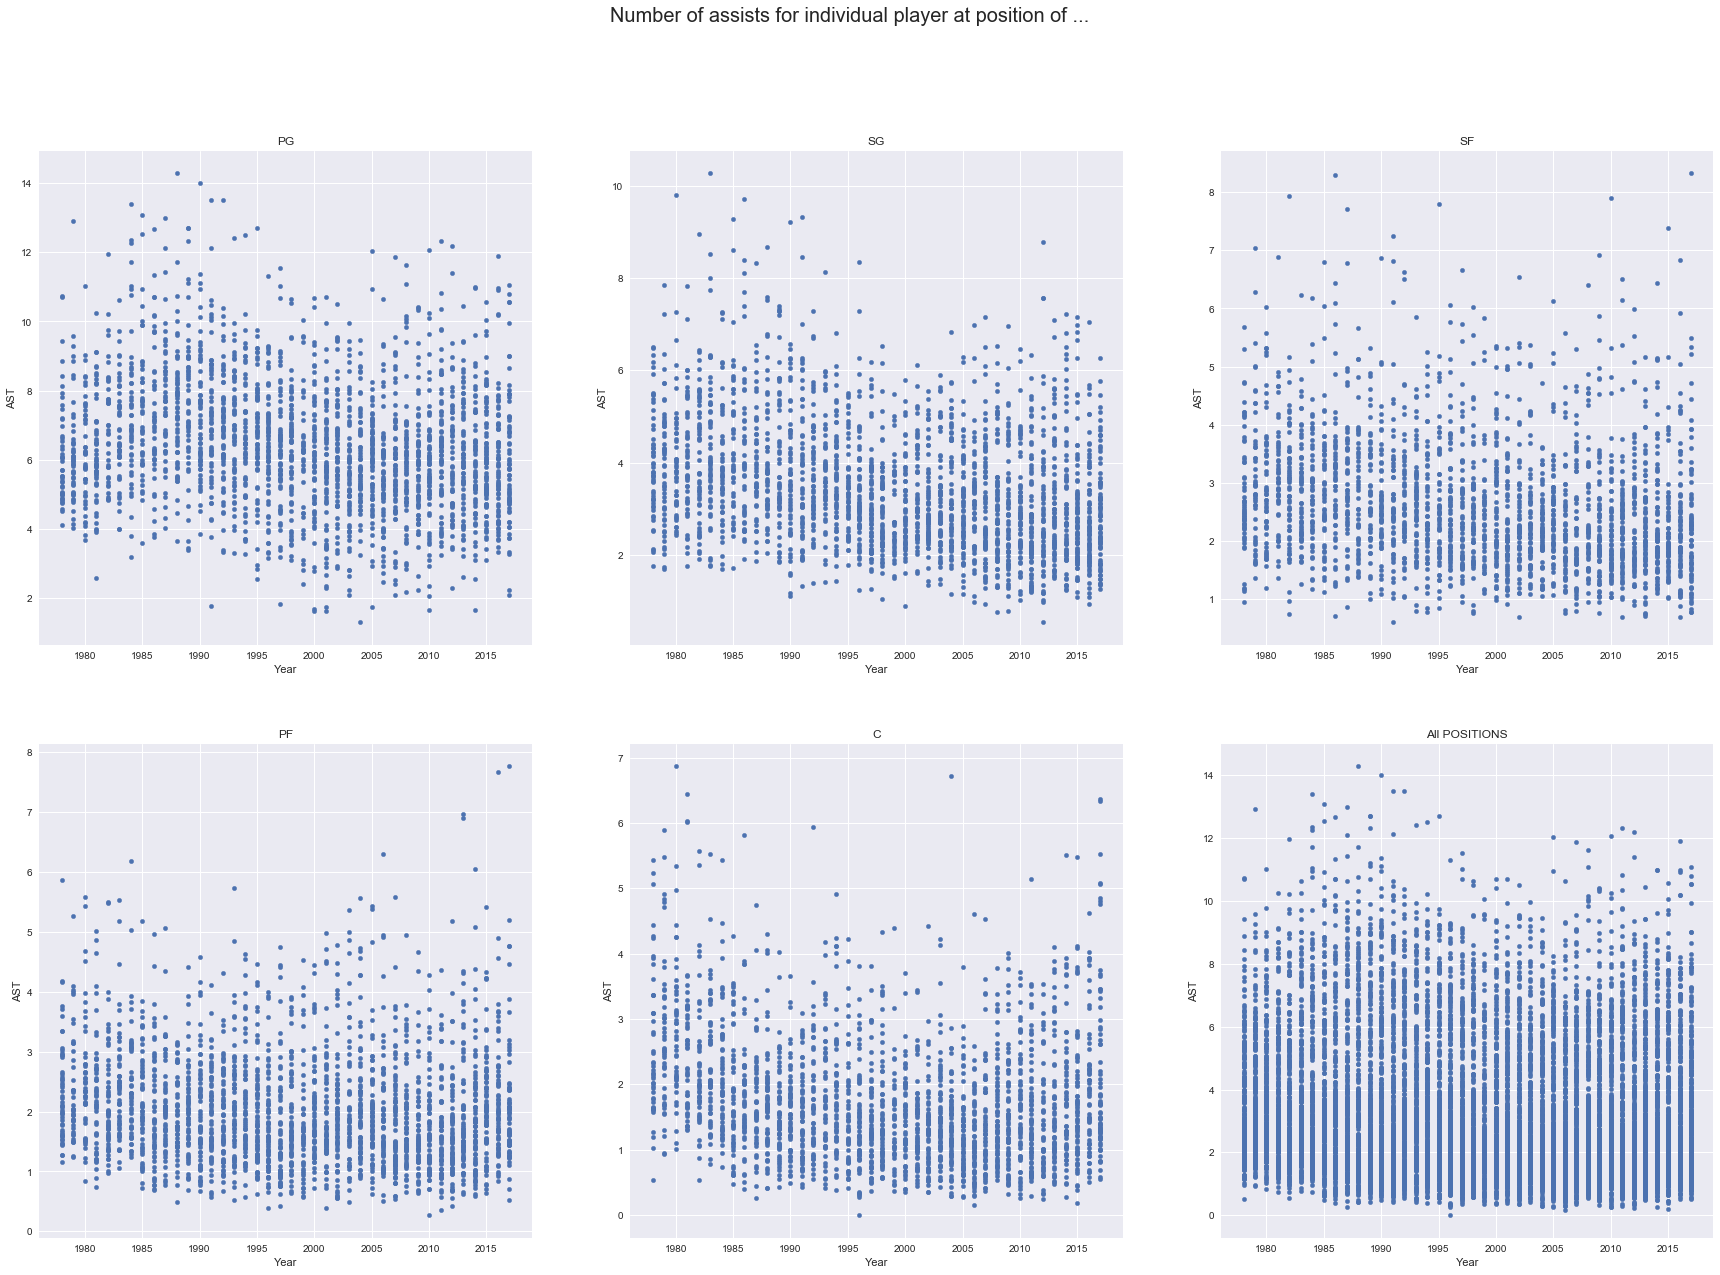

In [294]:
fig, axarr = plt.subplots(2, 3, figsize=(30, 20))
fig.suptitle('Number of assists for individual player at position of ...',fontsize=20)
pg.plot(kind='scatter',x='Year',y="AST",ax=axarr[0][0])
axarr[0, 0].set_title('PG')
sg.plot(kind='scatter',x='Year',y="AST",ax=axarr[0][1])
axarr[0, 1].set_title('SG')
sf.plot(kind='scatter',x='Year',y="AST",ax=axarr[0][2])
axarr[0, 2].set_title('SF')
pf.plot(kind='scatter',x='Year',y="AST",ax=axarr[1][0])
axarr[1, 0].set_title('PF')
c.plot(kind='scatter',x='Year',y="AST",ax=axarr[1][1])
axarr[1, 1].set_title('C')
data.plot(kind='scatter',x='Year',y="AST",ax=axarr[1][2])
axarr[1, 2].set_title('All POSITIONS')

####  Take the average number of assists per game of each players in different positions

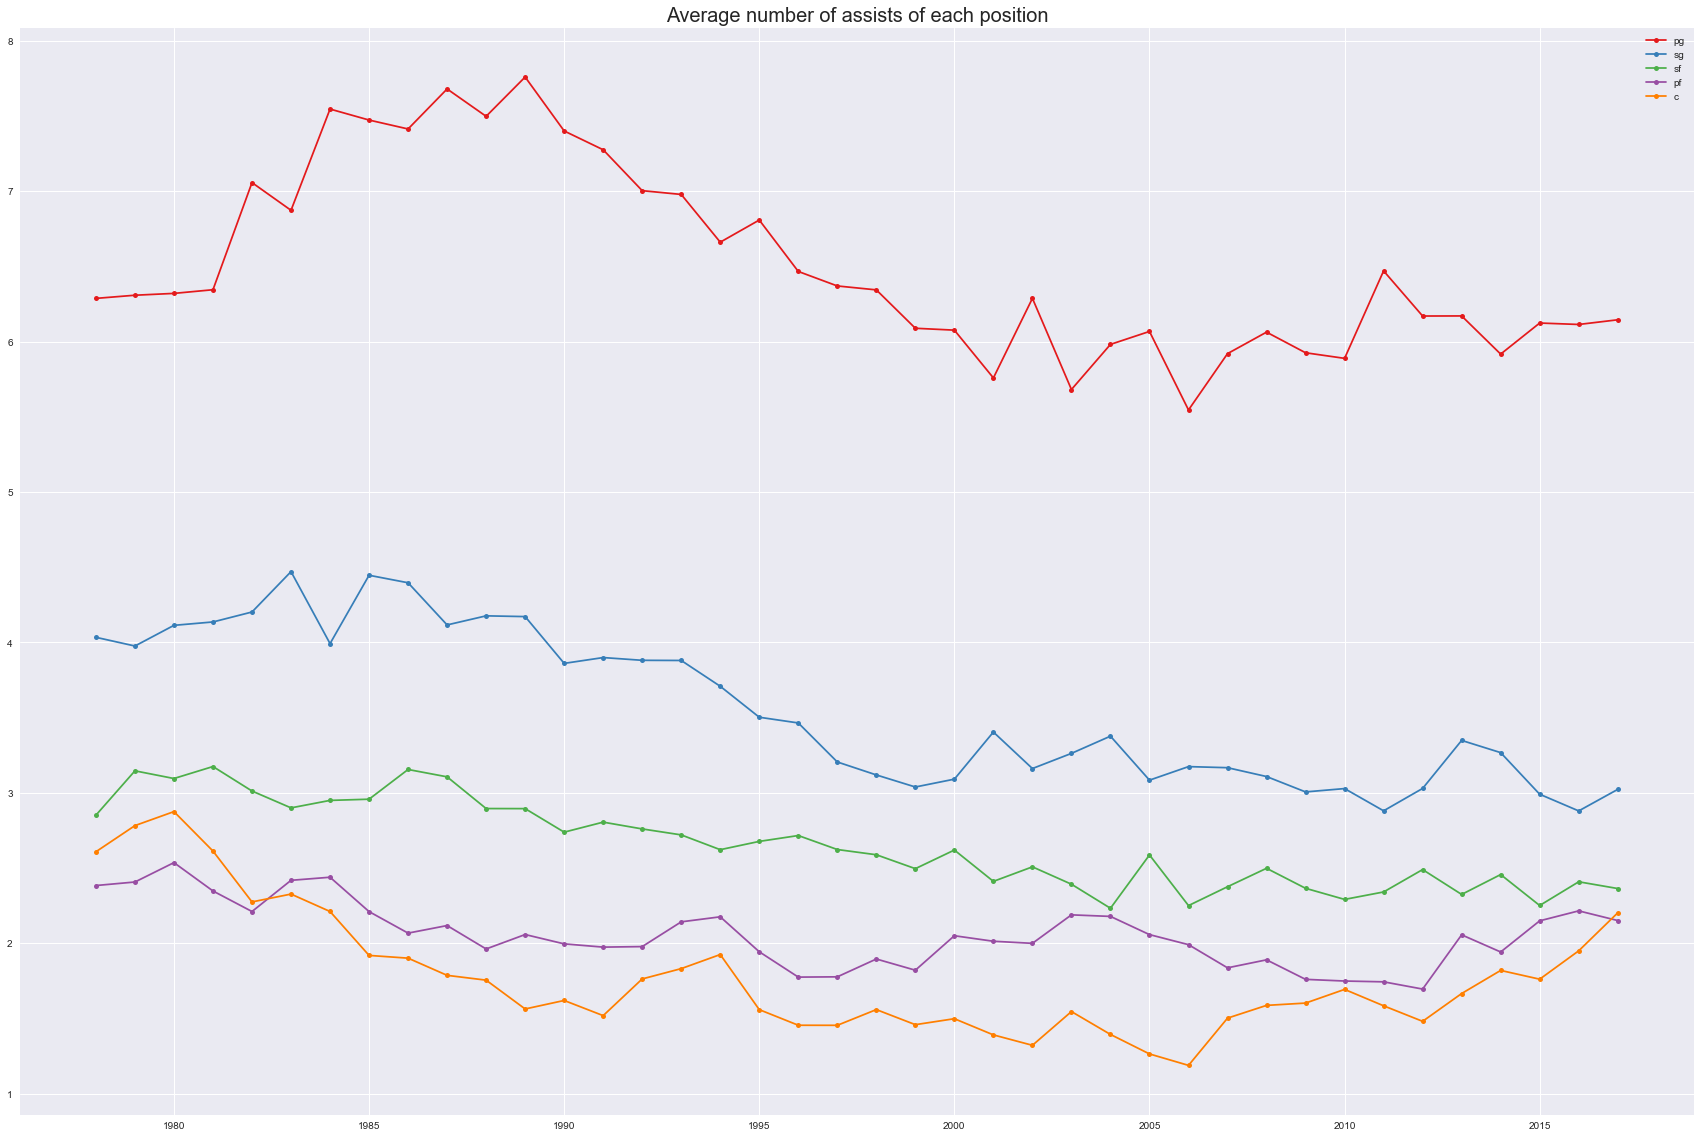

In [296]:
plt.figure(figsize=(30,20))
plt.title('Average number of assists of each position',fontsize=20)
bench_by_size = pg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['AST'],label='pg', linestyle='-', marker='o', markersize=5)

bench_by_size = sg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['AST'],label='sg', linestyle='-', marker='o', markersize=5)

bench_by_size = sf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['AST'],label='sf', linestyle='-', marker='o', markersize=5)

bench_by_size = pf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['AST'],label='pf', linestyle='-', marker='o', markersize=5)

bench_by_size = c.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['AST'],label='c', linestyle='-', marker='o', markersize=5)
plt.legend(loc='upper right')
plt.show()

Across all positions, particularly in pg, the number decreases gradually until 2000, and remains same since then

#### TRB (number of total rebound) of individual player in each position from 1978-2017

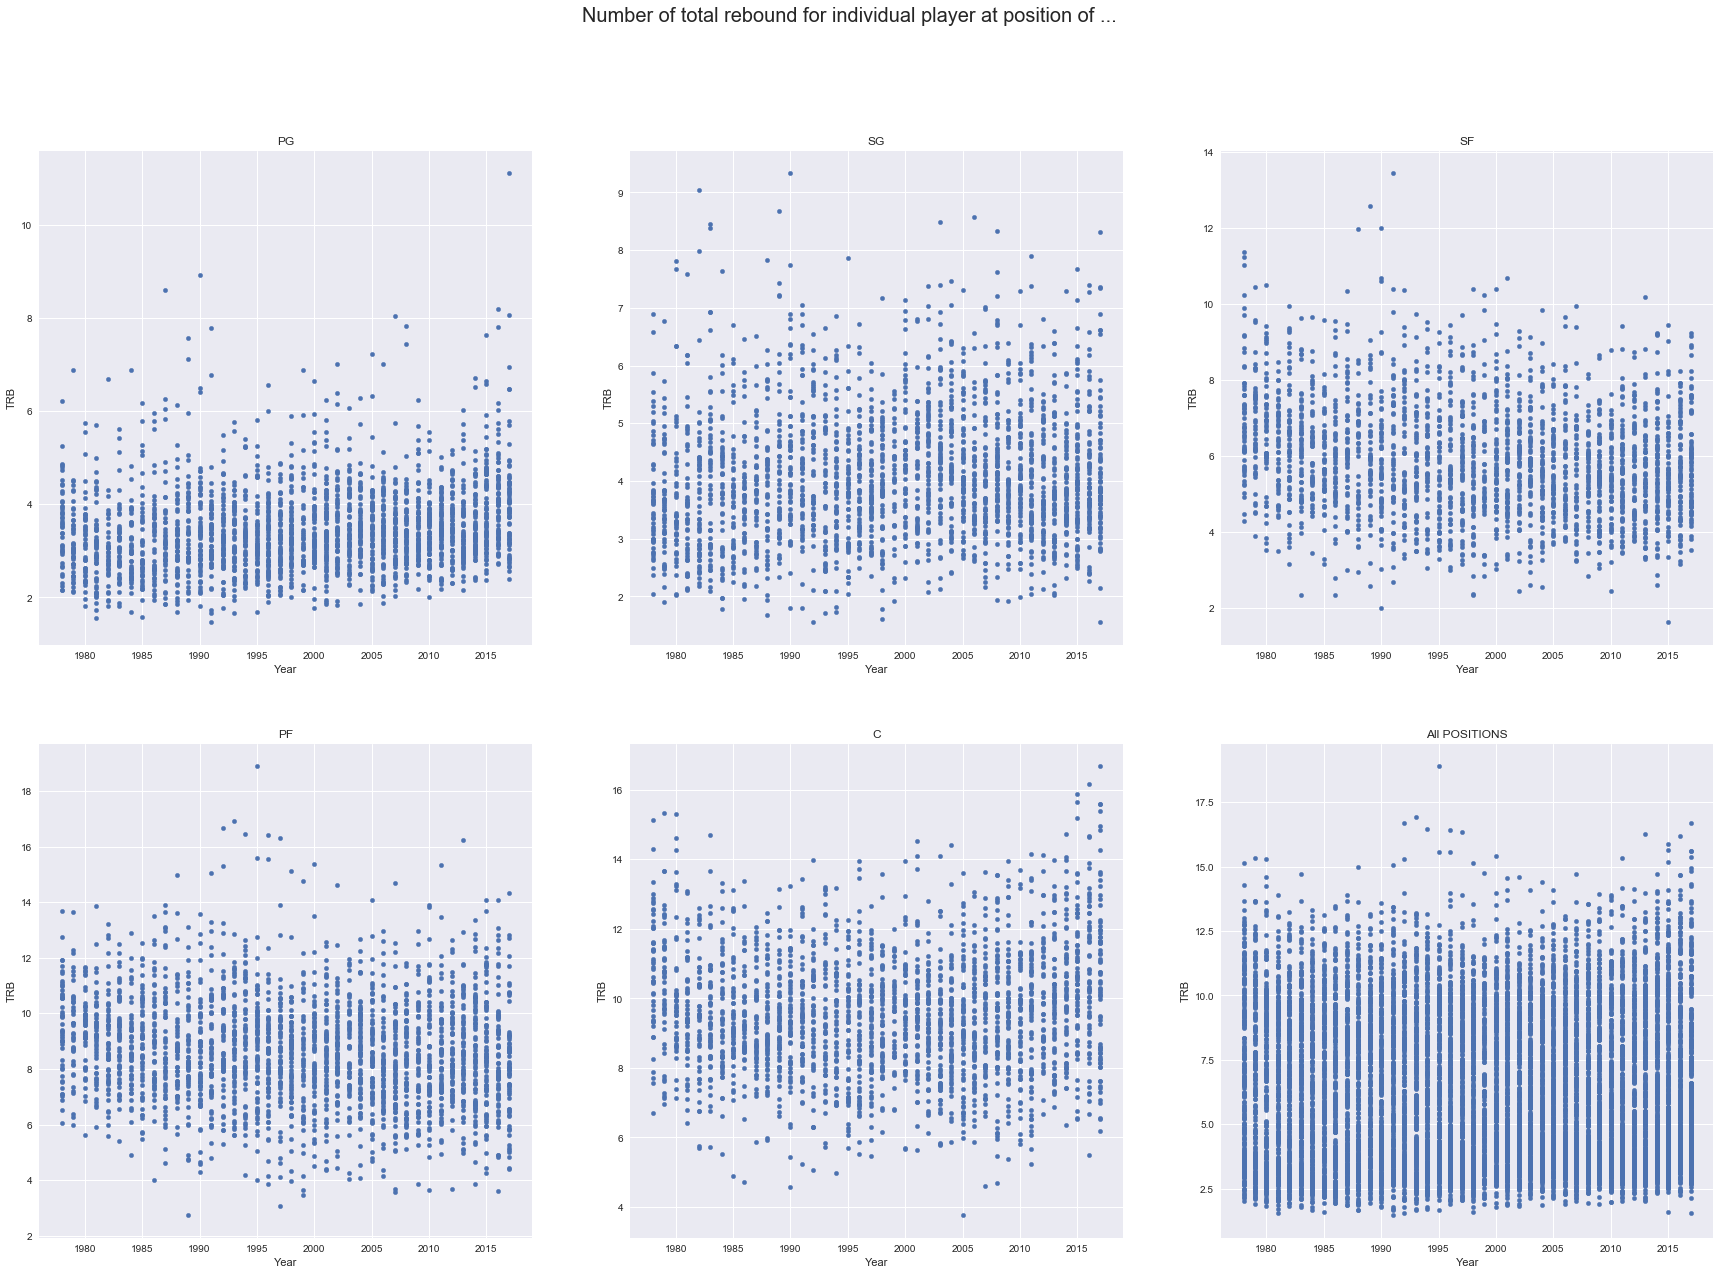

In [284]:
fig, axarr = plt.subplots(2, 3, figsize=(30, 20))
fig.suptitle('Number of total rebound for individual player at position of ...',fontsize=20)
pg.plot(kind='scatter',x='Year',y="TRB",ax=axarr[0][0])
axarr[0, 0].set_title('PG')
sg.plot(kind='scatter',x='Year',y="TRB",ax=axarr[0][1])
axarr[0, 1].set_title('SG')
sf.plot(kind='scatter',x='Year',y="TRB",ax=axarr[0][2])
axarr[0, 2].set_title('SF')
pf.plot(kind='scatter',x='Year',y="TRB",ax=axarr[1][0])
axarr[1, 0].set_title('PF')
c.plot(kind='scatter',x='Year',y="TRB",ax=axarr[1][1])
axarr[1, 1].set_title('C')
data.plot(kind='scatter',x='Year',y="TRB",ax=axarr[1][2])
axarr[1, 2].set_title('All POSITIONS')

A slight increase in number of rebounds in PG can be observed after 2010, beside that this number attributes stays around the same across most other positions.

####  Take the average number of total rebounds per game of each players in different positions

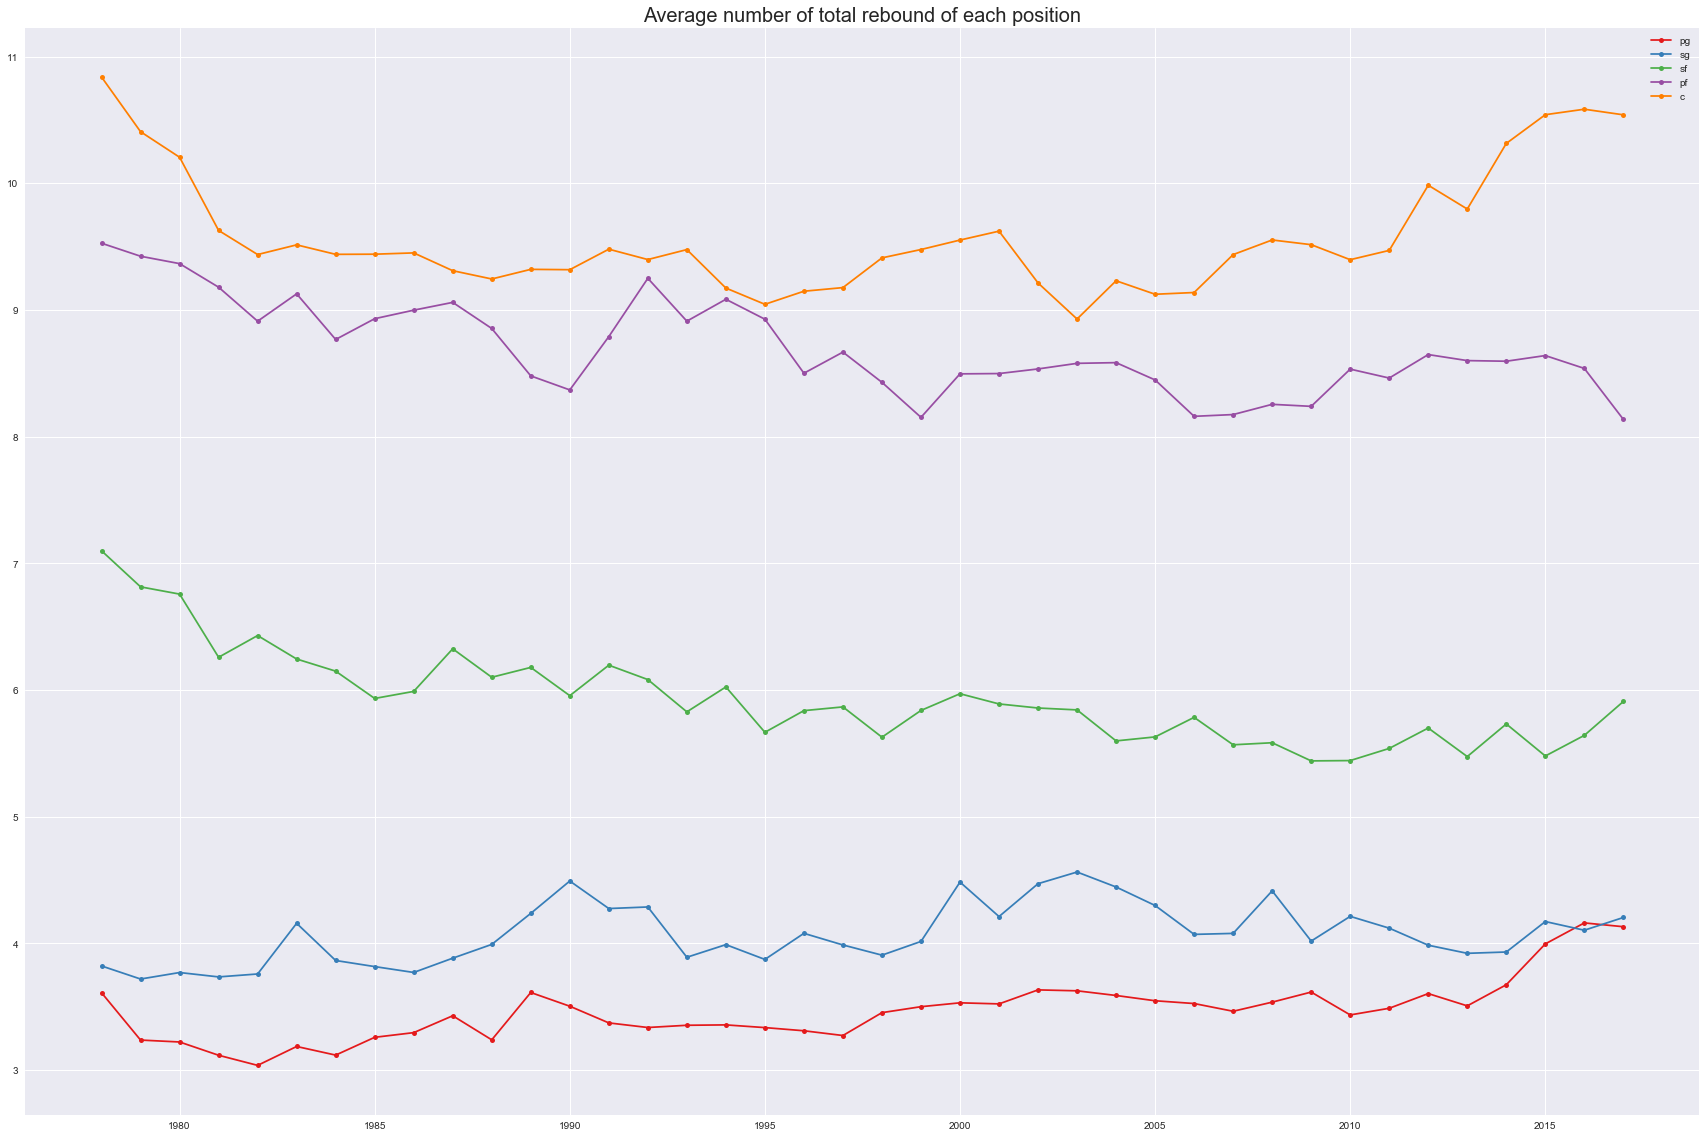

In [297]:
plt.figure(figsize=(30,20))
plt.title('Average number of total rebound of each position',fontsize=20)
bench_by_size = pg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['TRB'], label='pg',linestyle='-', marker='o', markersize=5)

bench_by_size = sg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['TRB'], label='sg',linestyle='-', marker='o', markersize=5)

bench_by_size = sf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['TRB'], label='sf',linestyle='-', marker='o', markersize=5)

bench_by_size = pf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['TRB'], label='pf',linestyle='-', marker='o', markersize=5)

bench_by_size = c.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['TRB'], label='c',linestyle='-', marker='o', markersize=5)
plt.legend(loc='upper right')
plt.show()

Number of total rebounds stays much the same across all positions throughout times

#### 2PA (number of 2-pointer attempt) of individual player in each position from 1978-2017

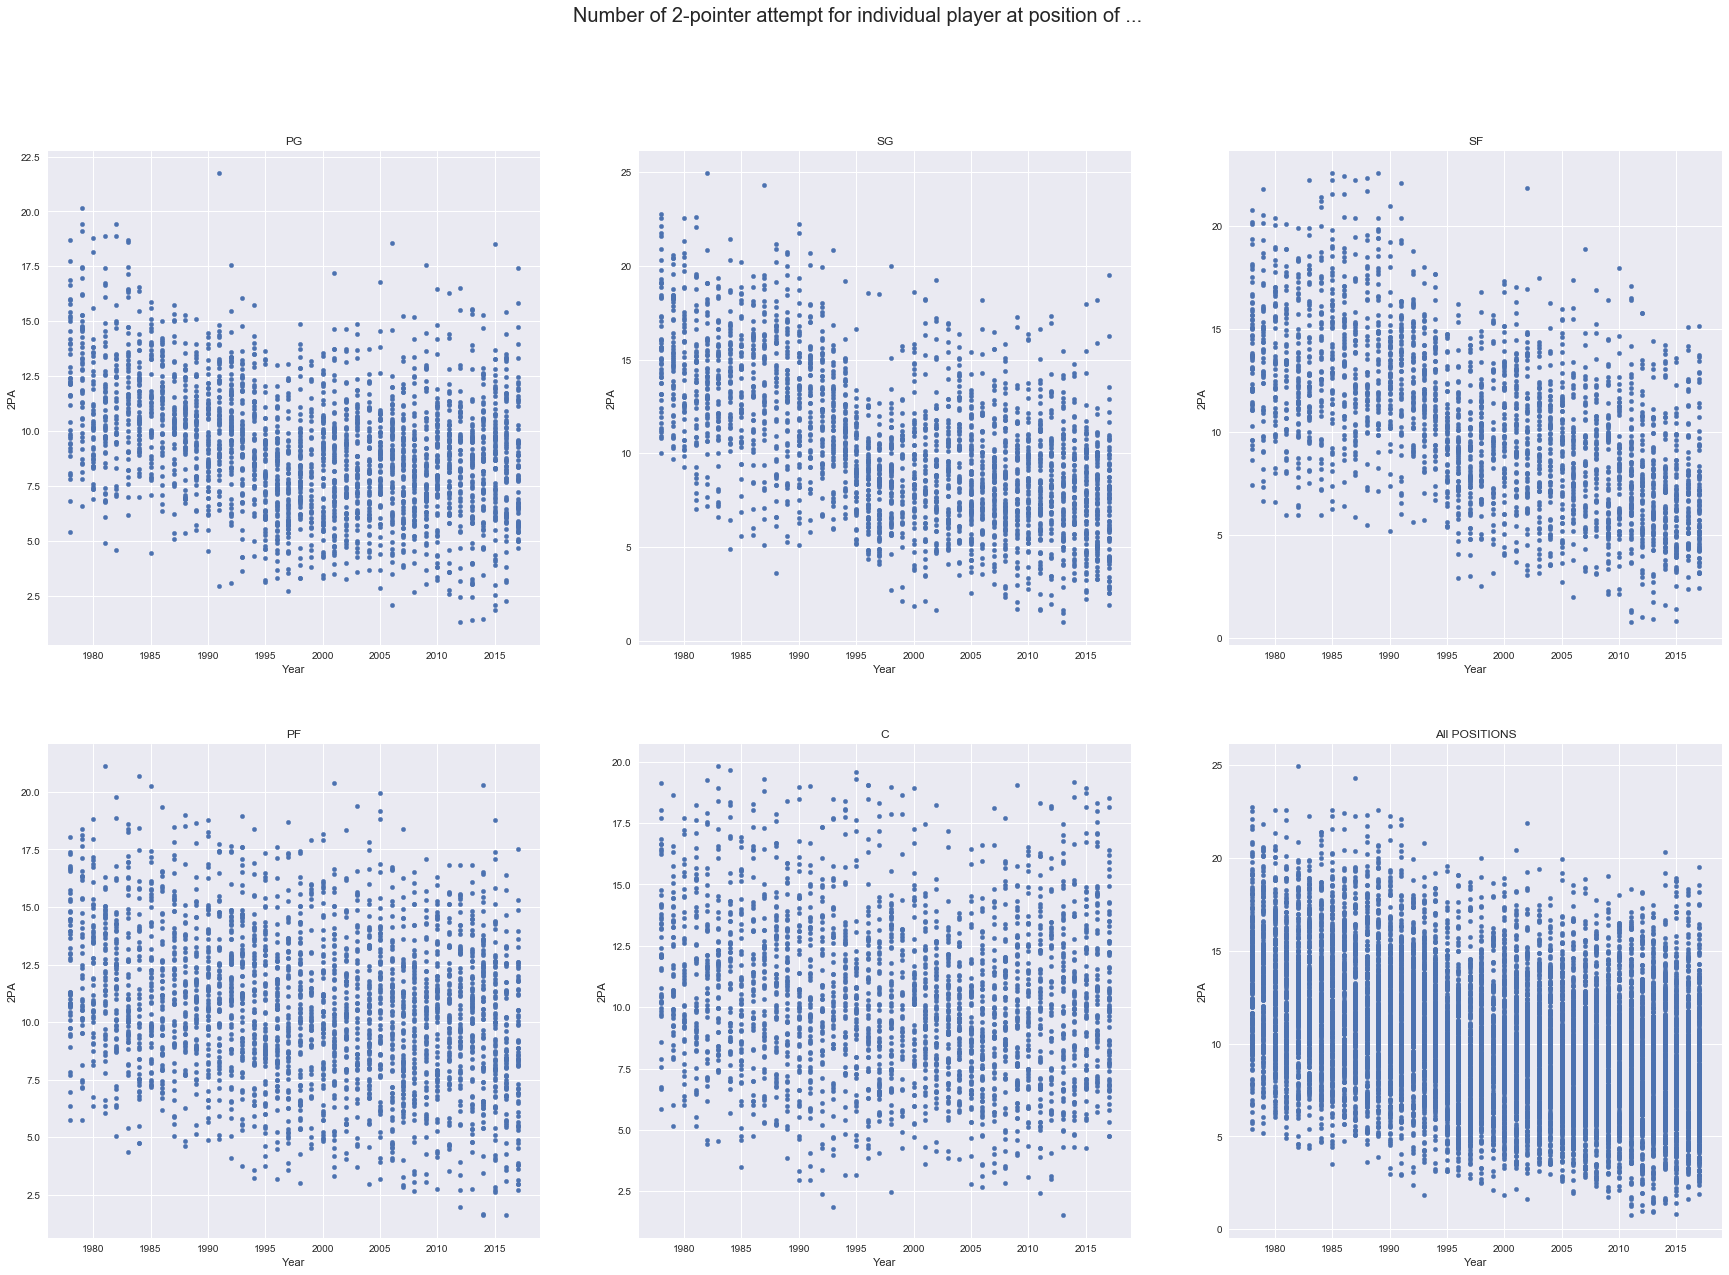

In [286]:
fig, axarr = plt.subplots(2, 3, figsize=(30, 20))
fig.suptitle('Number of 2-pointer attempt for individual player at position of ...',fontsize=20)
pg.plot(kind='scatter',x='Year',y="2PA",ax=axarr[0][0])
axarr[0, 0].set_title('PG')
sg.plot(kind='scatter',x='Year',y="2PA",ax=axarr[0][1])
axarr[0, 1].set_title('SG')
sf.plot(kind='scatter',x='Year',y="2PA",ax=axarr[0][2])
axarr[0, 2].set_title('SF')
pf.plot(kind='scatter',x='Year',y="2PA",ax=axarr[1][0])
axarr[1, 0].set_title('PF')
c.plot(kind='scatter',x='Year',y="2PA",ax=axarr[1][1])
axarr[1, 1].set_title('C')
data.plot(kind='scatter',x='Year',y="2PA",ax=axarr[1][2])
axarr[1, 2].set_title('All POSITIONS')

A decrease trend is very obvious, and mostly happens in PG, SG, SF.

####  Take the average number of 2-pointer attempts per game of each players in different positions

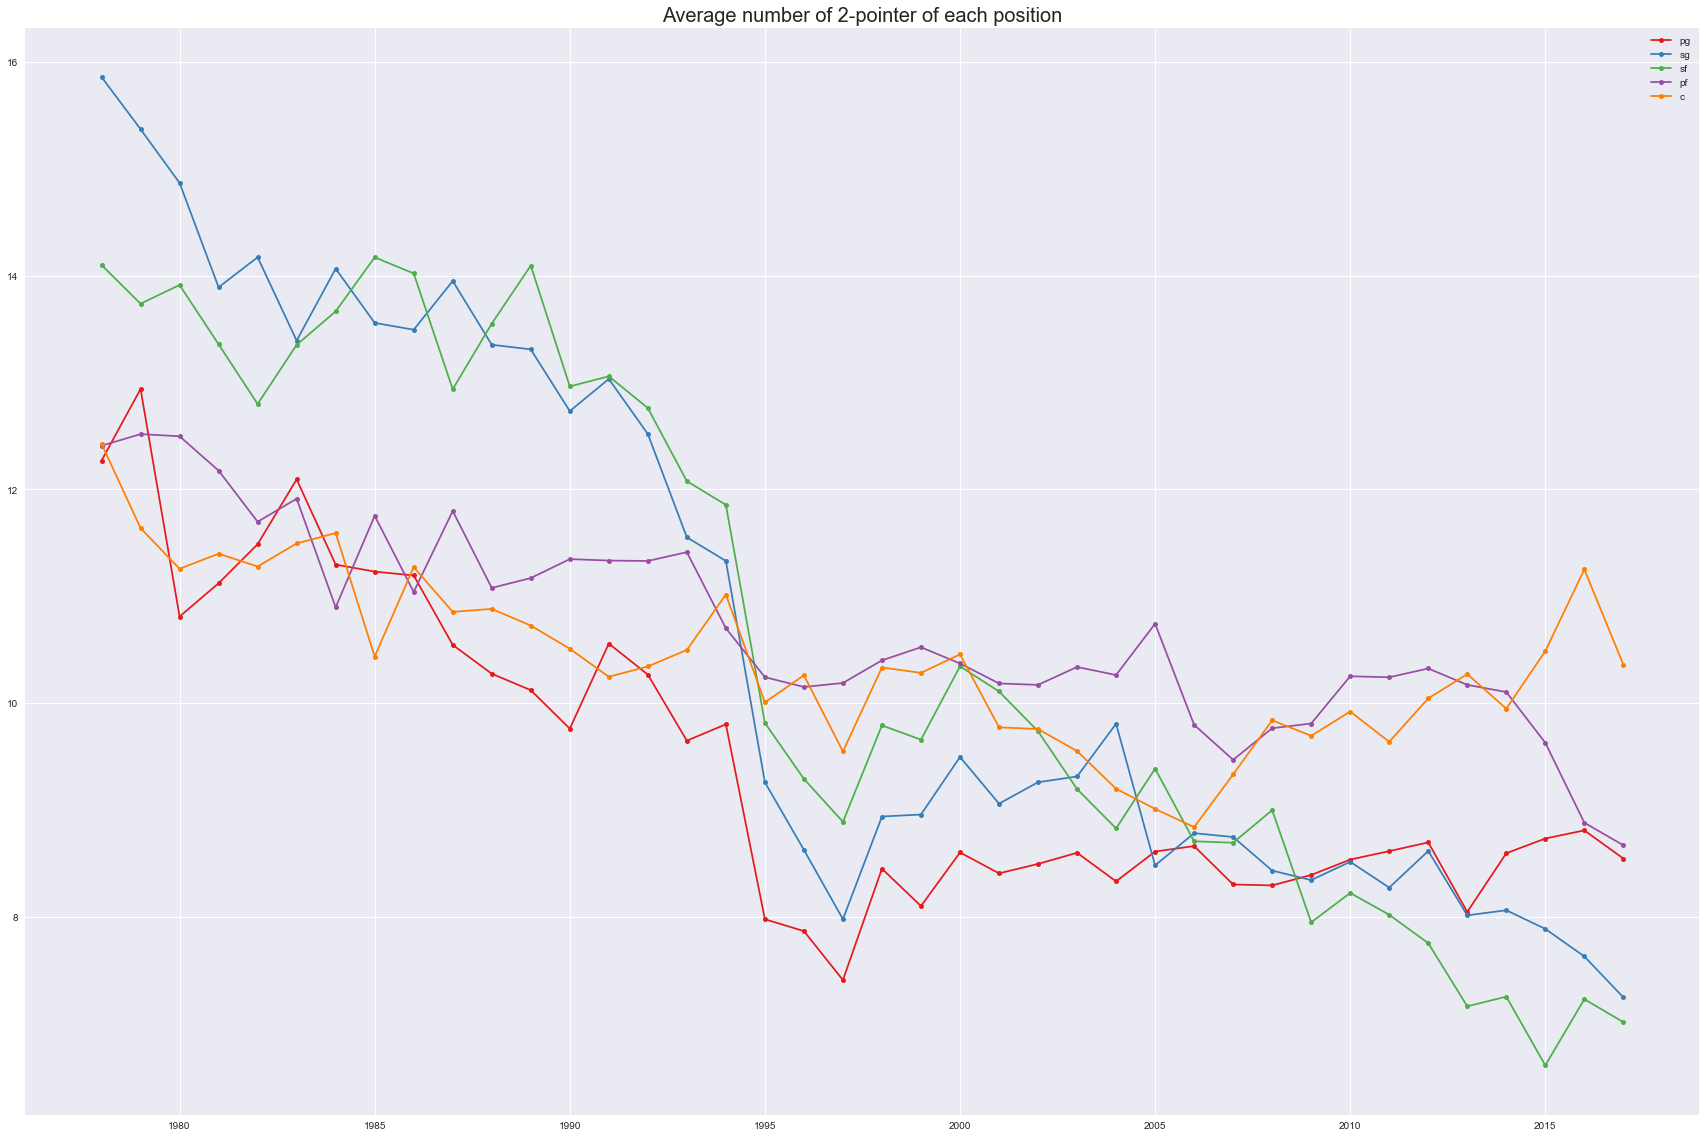

In [298]:
plt.figure(figsize=(30,20))
plt.title('Average number of 2-pointer of each position',fontsize=20)
bench_by_size = pg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['2PA'], label='pg',linestyle='-', marker='o', markersize=5)

bench_by_size = sg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['2PA'], label='sg',linestyle='-', marker='o', markersize=5)

bench_by_size = sf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['2PA'], label='sf',linestyle='-', marker='o', markersize=5)

bench_by_size = pf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['2PA'], label='pf',linestyle='-', marker='o', markersize=5)

bench_by_size = c.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['2PA'], label='c',linestyle='-', marker='o', markersize=5)
plt.legend(loc='upper right')
plt.show()

Number of 2-pointer attempts experiences significant decrease in all positions, especailly in sg and sf, until 1997, then stays at the similar level, or continue to decrese in the cases of sg and sf.

#### PF (number of personal fouls) of individual player in each position from 1978-2017

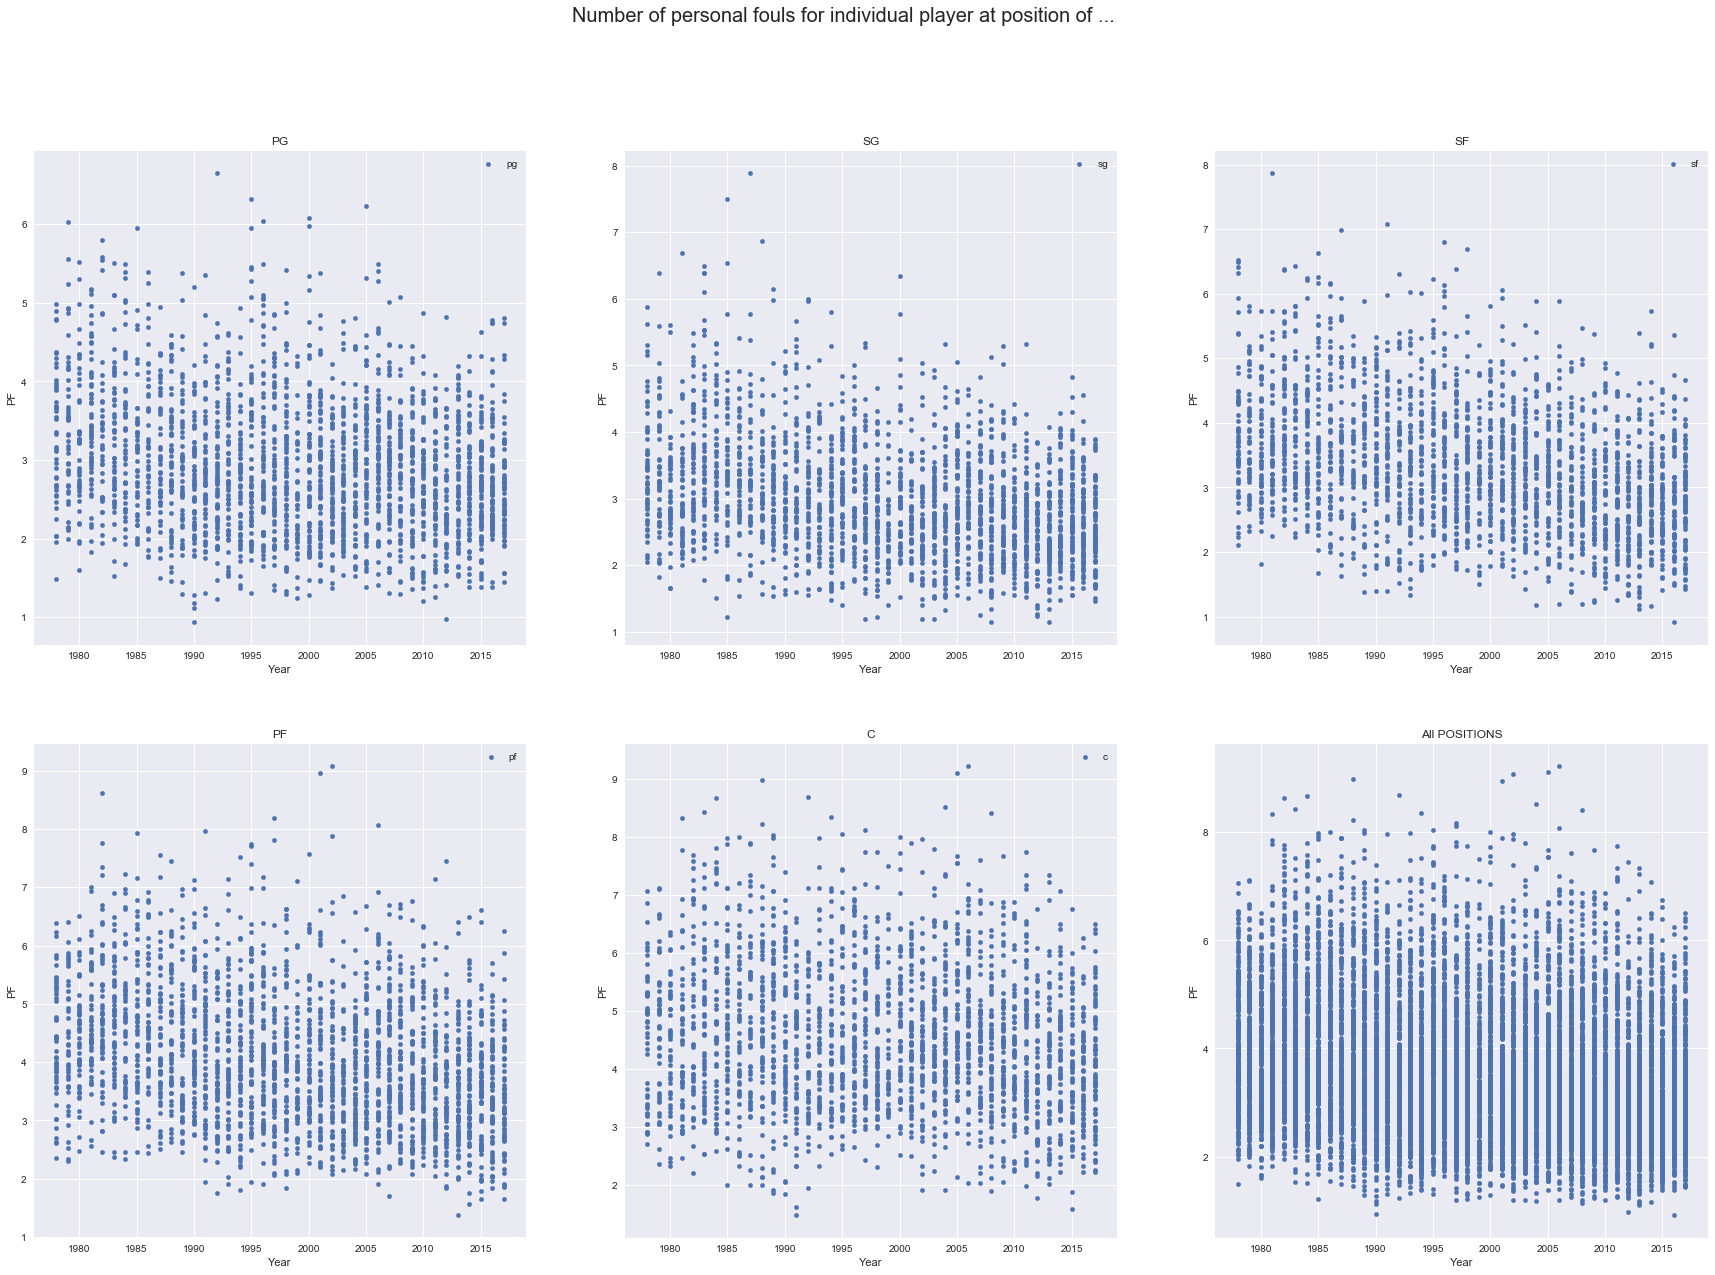

In [300]:
fig, axarr = plt.subplots(2, 3, figsize=(30, 20))
fig.suptitle('Number of personal fouls for individual player at position of ...',fontsize=20)
pg.plot(kind='scatter', x='Year', y="PF",ax=axarr[0][0])
axarr[0, 0].set_title('PG')
sg.plot(kind='scatter', x='Year',y="PF",ax=axarr[0][1])
axarr[0, 1].set_title('SG')
sf.plot(kind='scatter', x='Year',y="PF",ax=axarr[0][2])
axarr[0, 2].set_title('SF')
pf.plot(kind='scatter', x='Year',y="PF",ax=axarr[1][0])
axarr[1, 0].set_title('PF')
c.plot(kind='scatter', x='Year',y="PF",ax=axarr[1][1])
axarr[1, 1].set_title('C')
data.plot(kind='scatter',x='Year',y="PF",ax=axarr[1][2])
axarr[1, 2].set_title('All POSITIONS')

####  Take the average number of personal fouls per game of each player in different positions

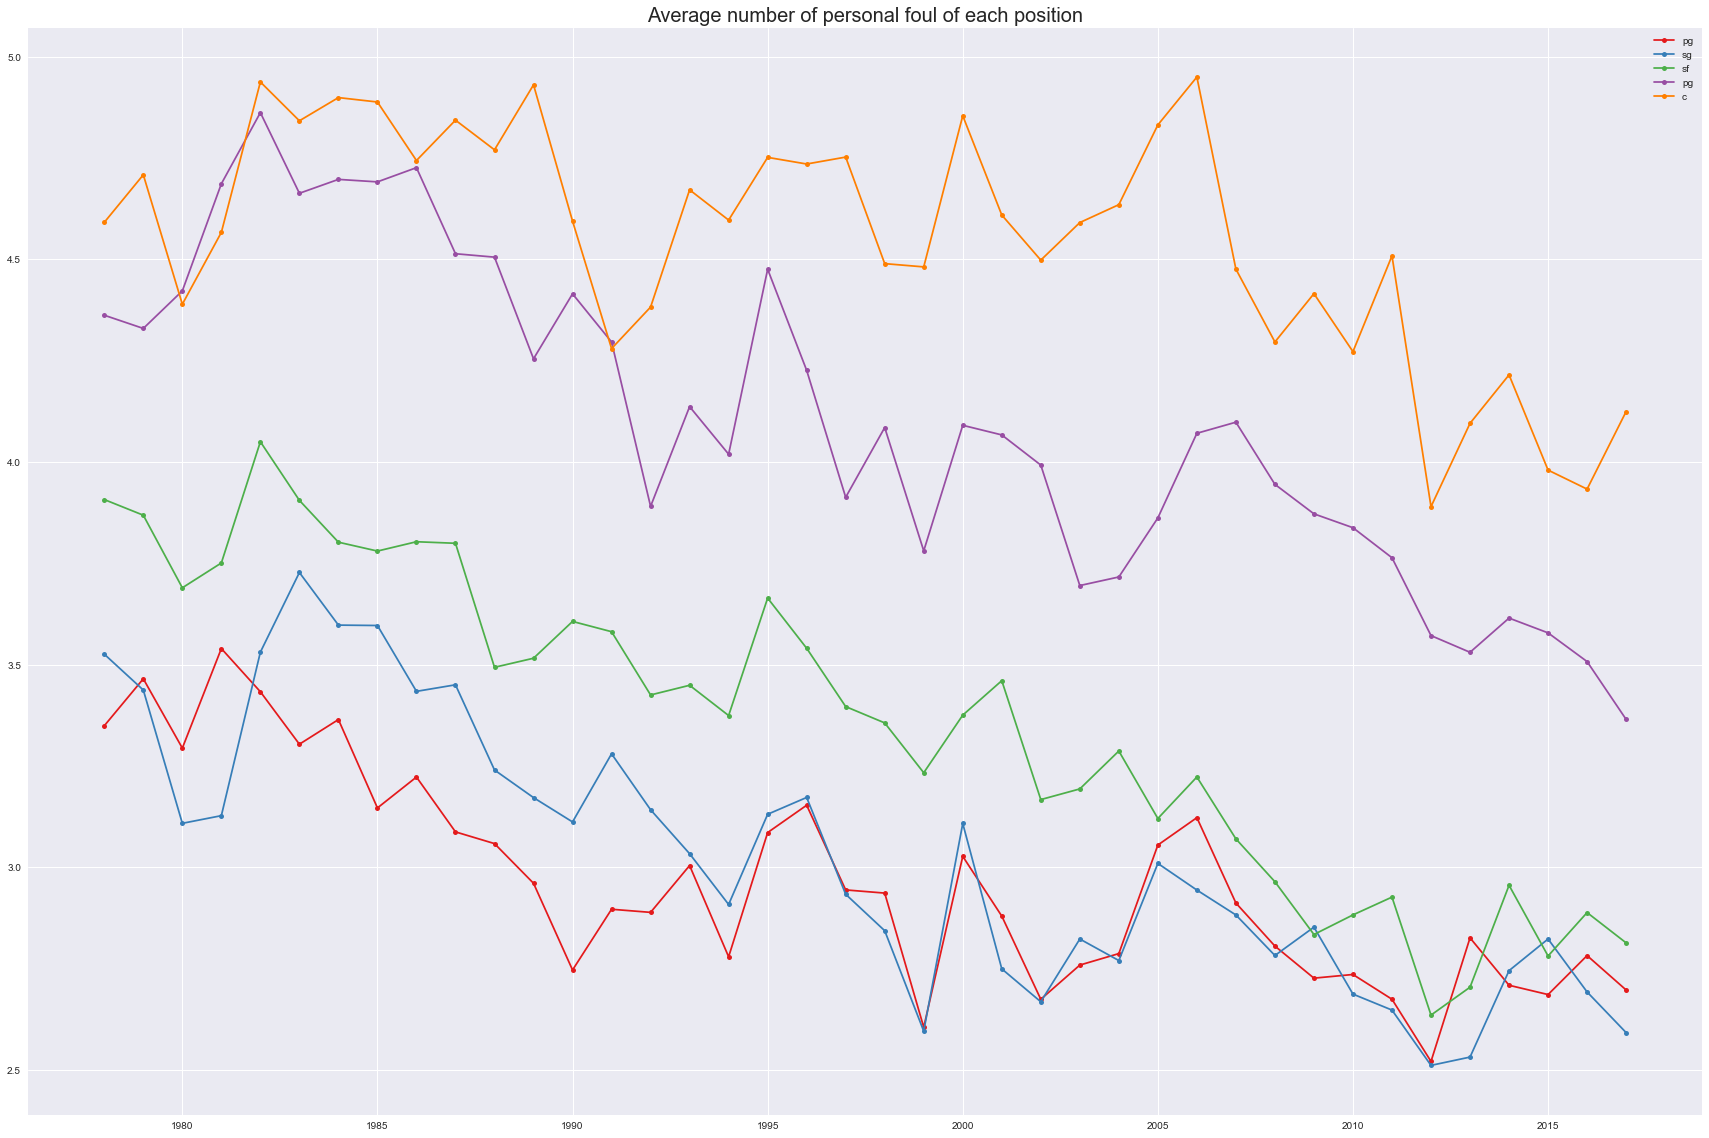

In [301]:
plt.figure(figsize=(30,20))
plt.title('Average number of personal foul of each position',fontsize=20)
bench_by_size = pg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['PF'], label='pg', linestyle='-', marker='o', markersize=5)

bench_by_size = sg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['PF'], label='sg', linestyle='-', marker='o', markersize=5)

bench_by_size = sf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['PF'], label='sf', linestyle='-', marker='o', markersize=5)

bench_by_size = pf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['PF'], label='pg', linestyle='-', marker='o', markersize=5)

bench_by_size = c.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['PF'], label='c', linestyle='-', marker='o', markersize=5)
plt.legend(loc='upper right')
plt.show()

Number of personal fouls decreass gradually across all positions, but C still leads by a wider margin in number of personal fouls in 5 positions. 

## Explore associated attributes

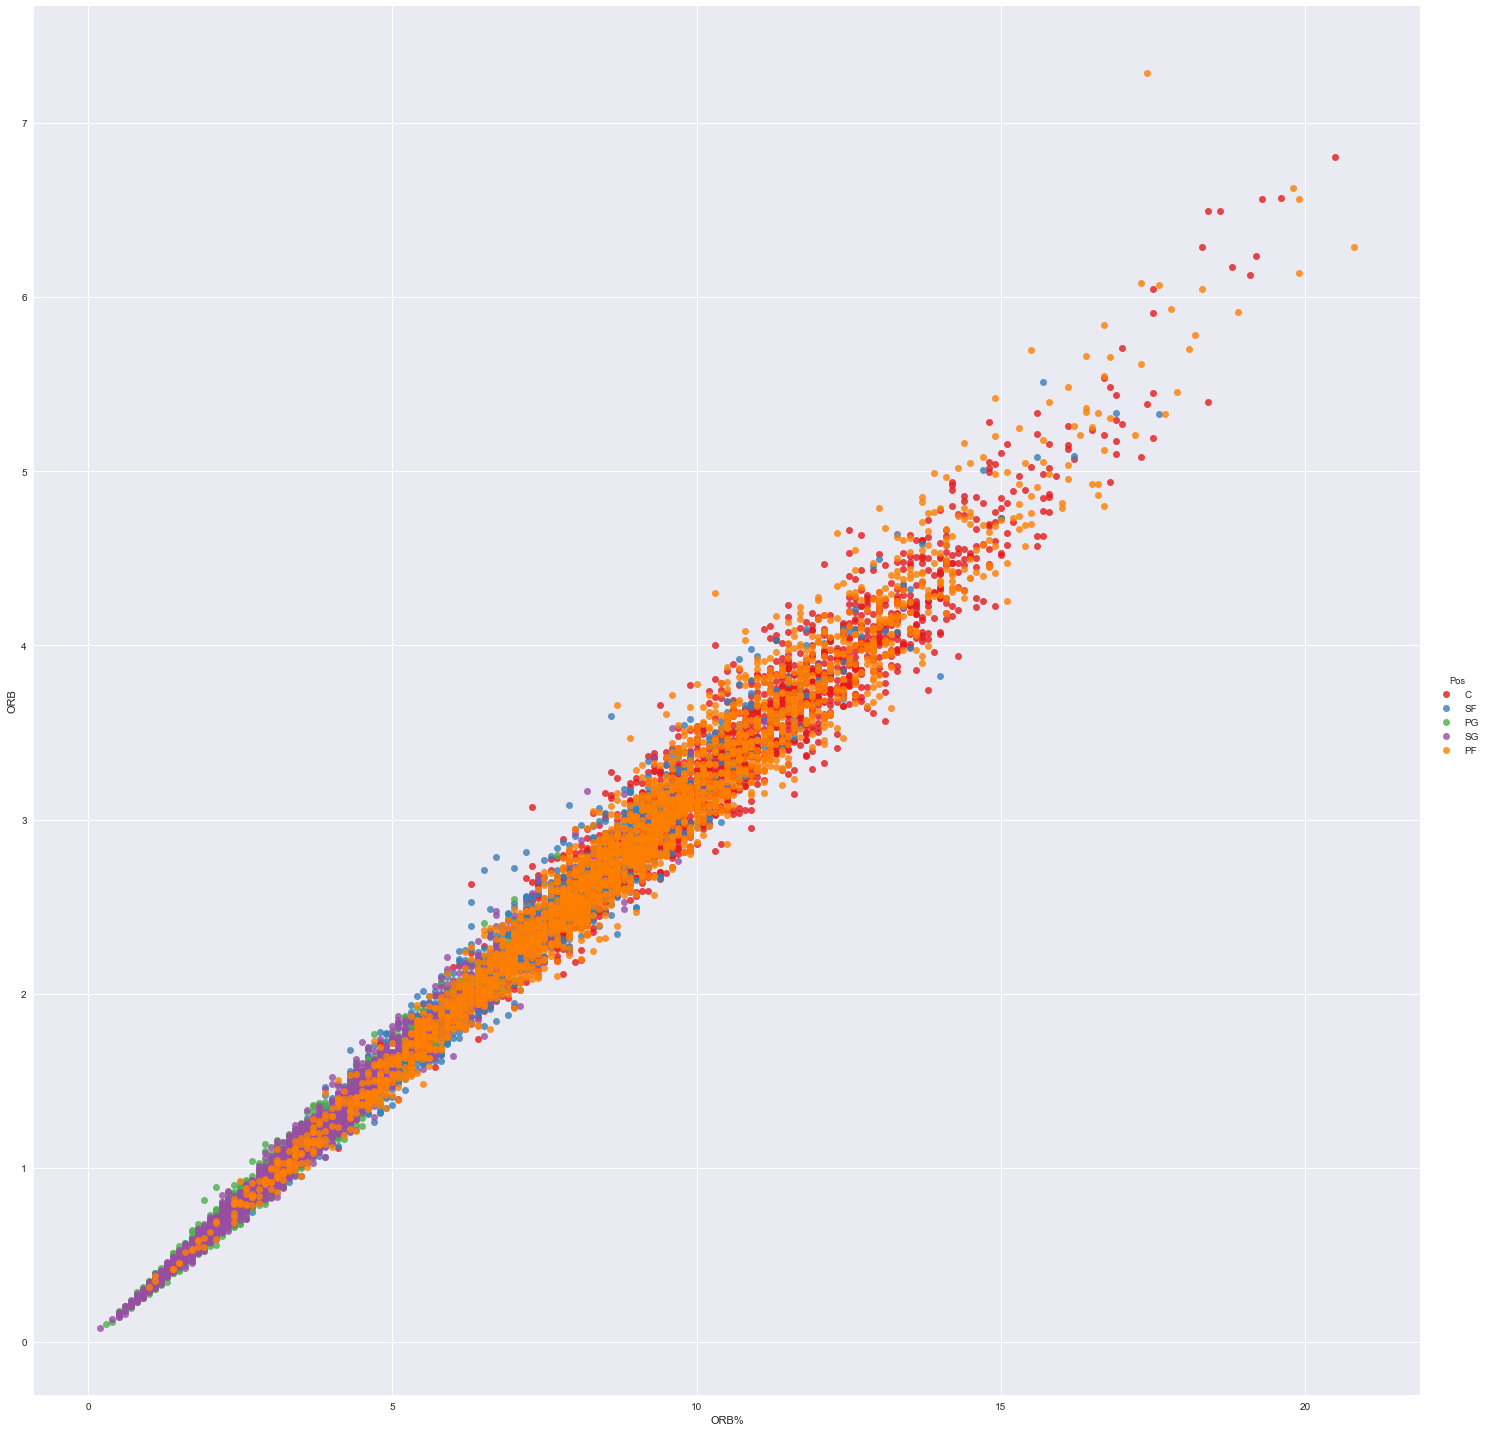

In [229]:
sns.lmplot( x="ORB%", y="ORB",size=20, data=data, fit_reg=False, hue="Pos", legend=True)

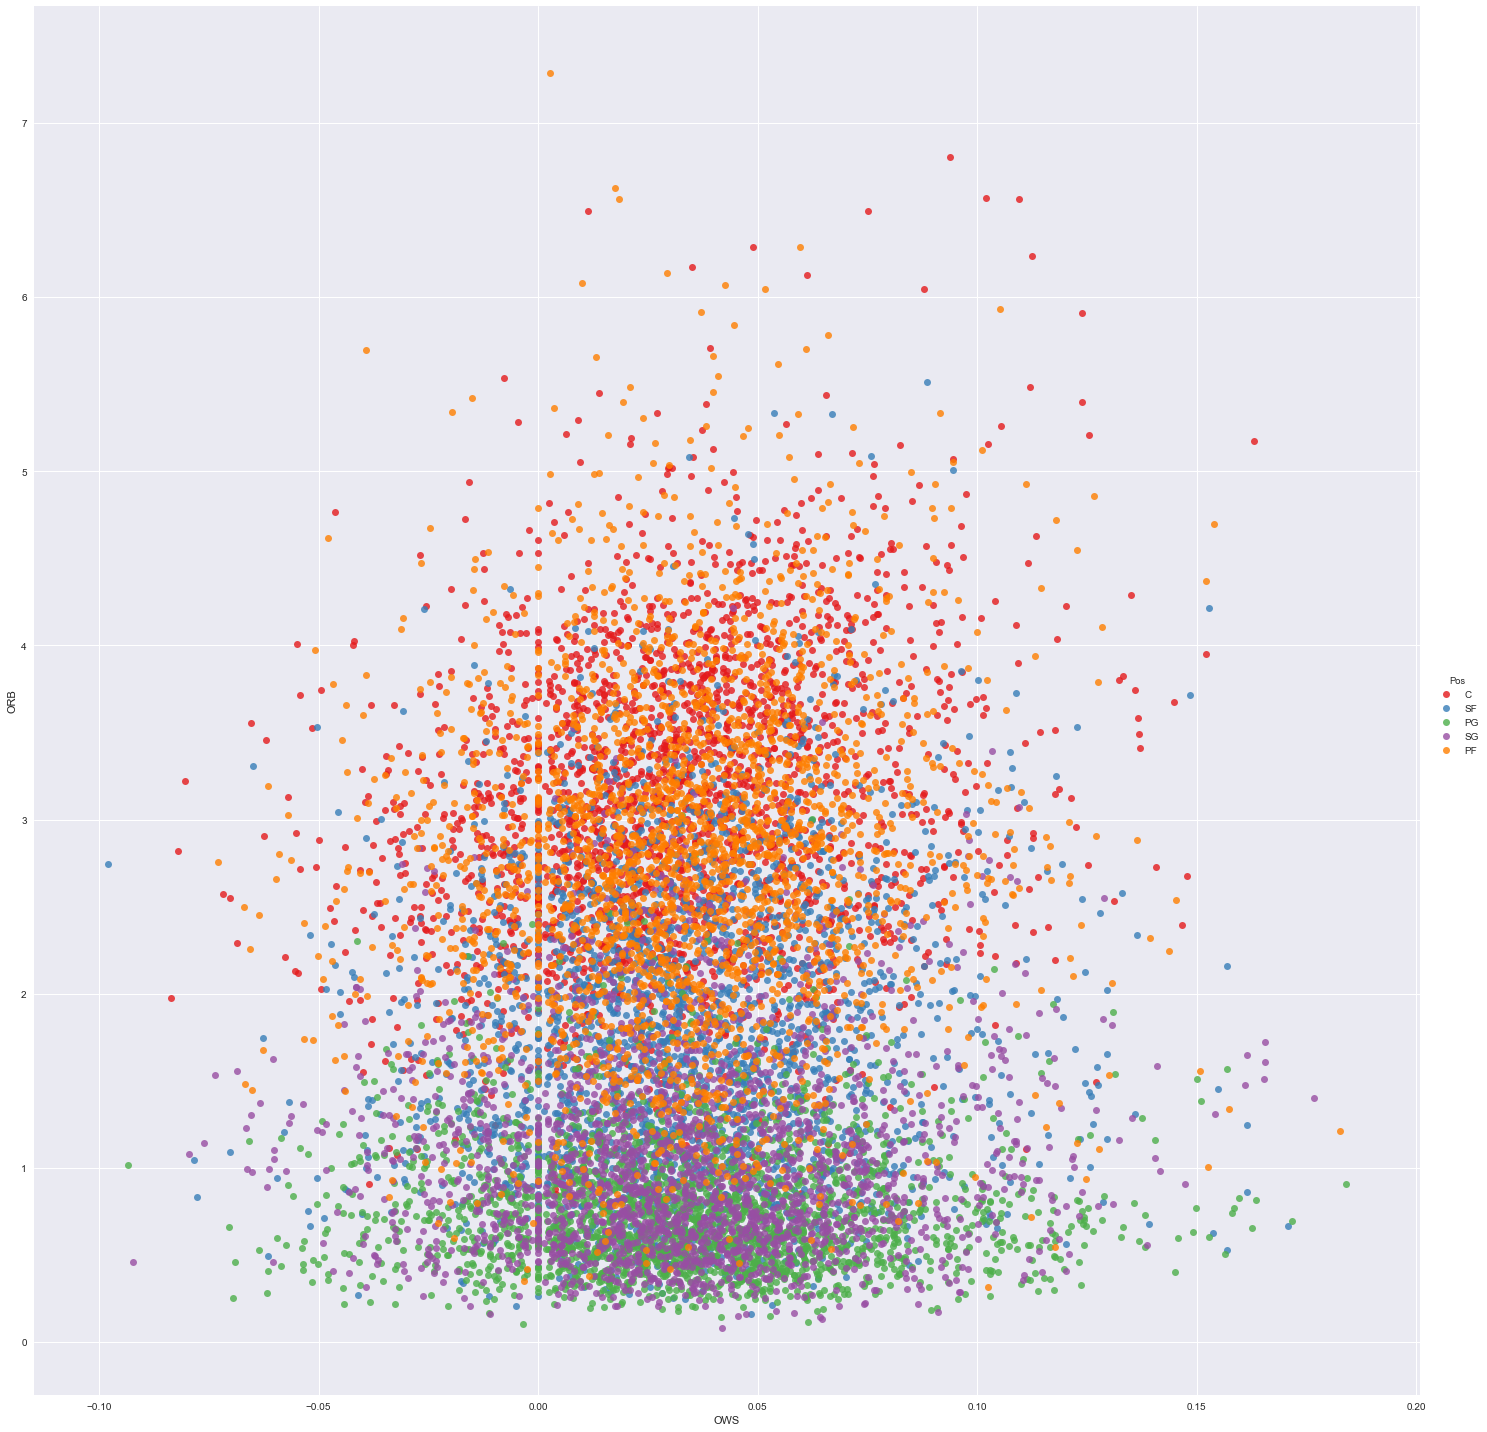

In [306]:
sns.lmplot( x="OWS", y="ORB",size=20, data=data, fit_reg=False, hue="Pos", legend=True)

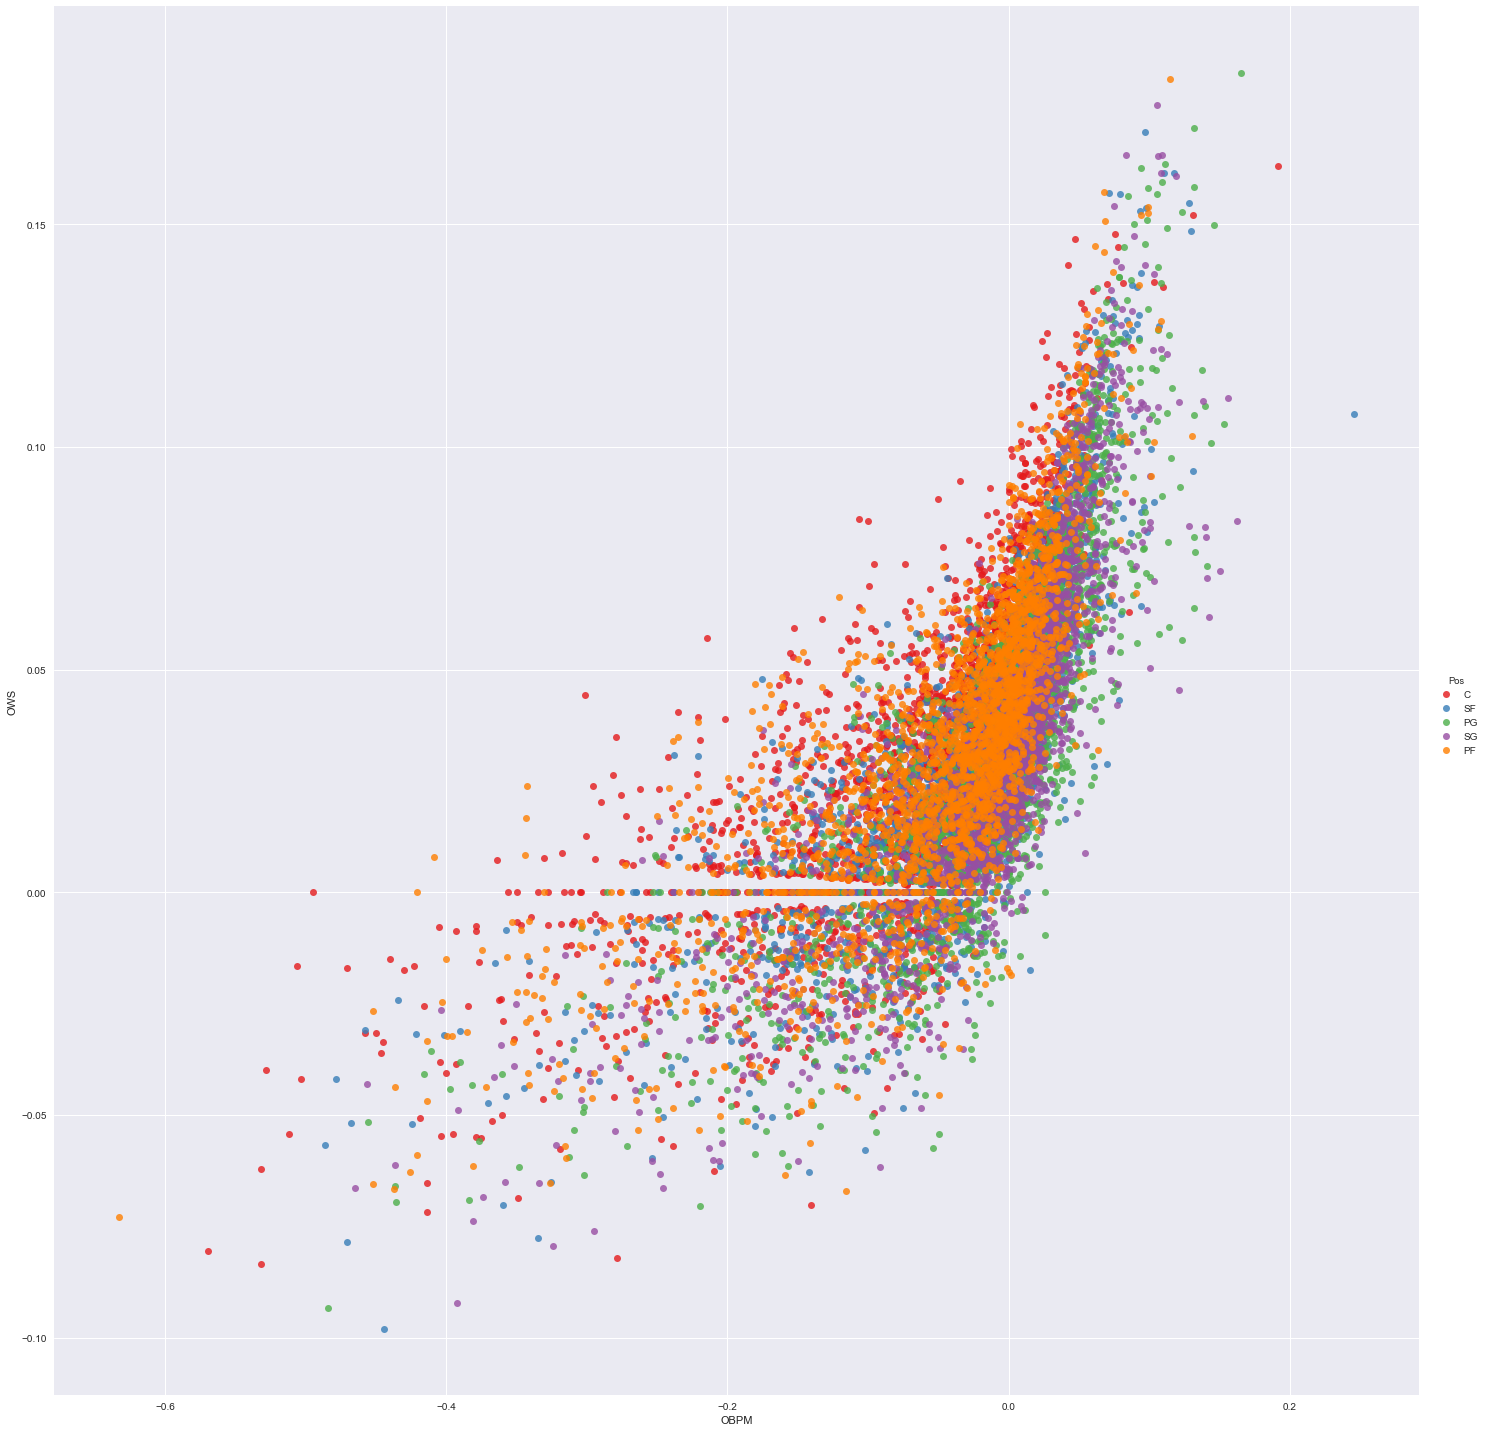

In [231]:
sns.lmplot( x="OBPM", y="OWS",size=20, data=data, fit_reg=False, hue="Pos", legend=True)

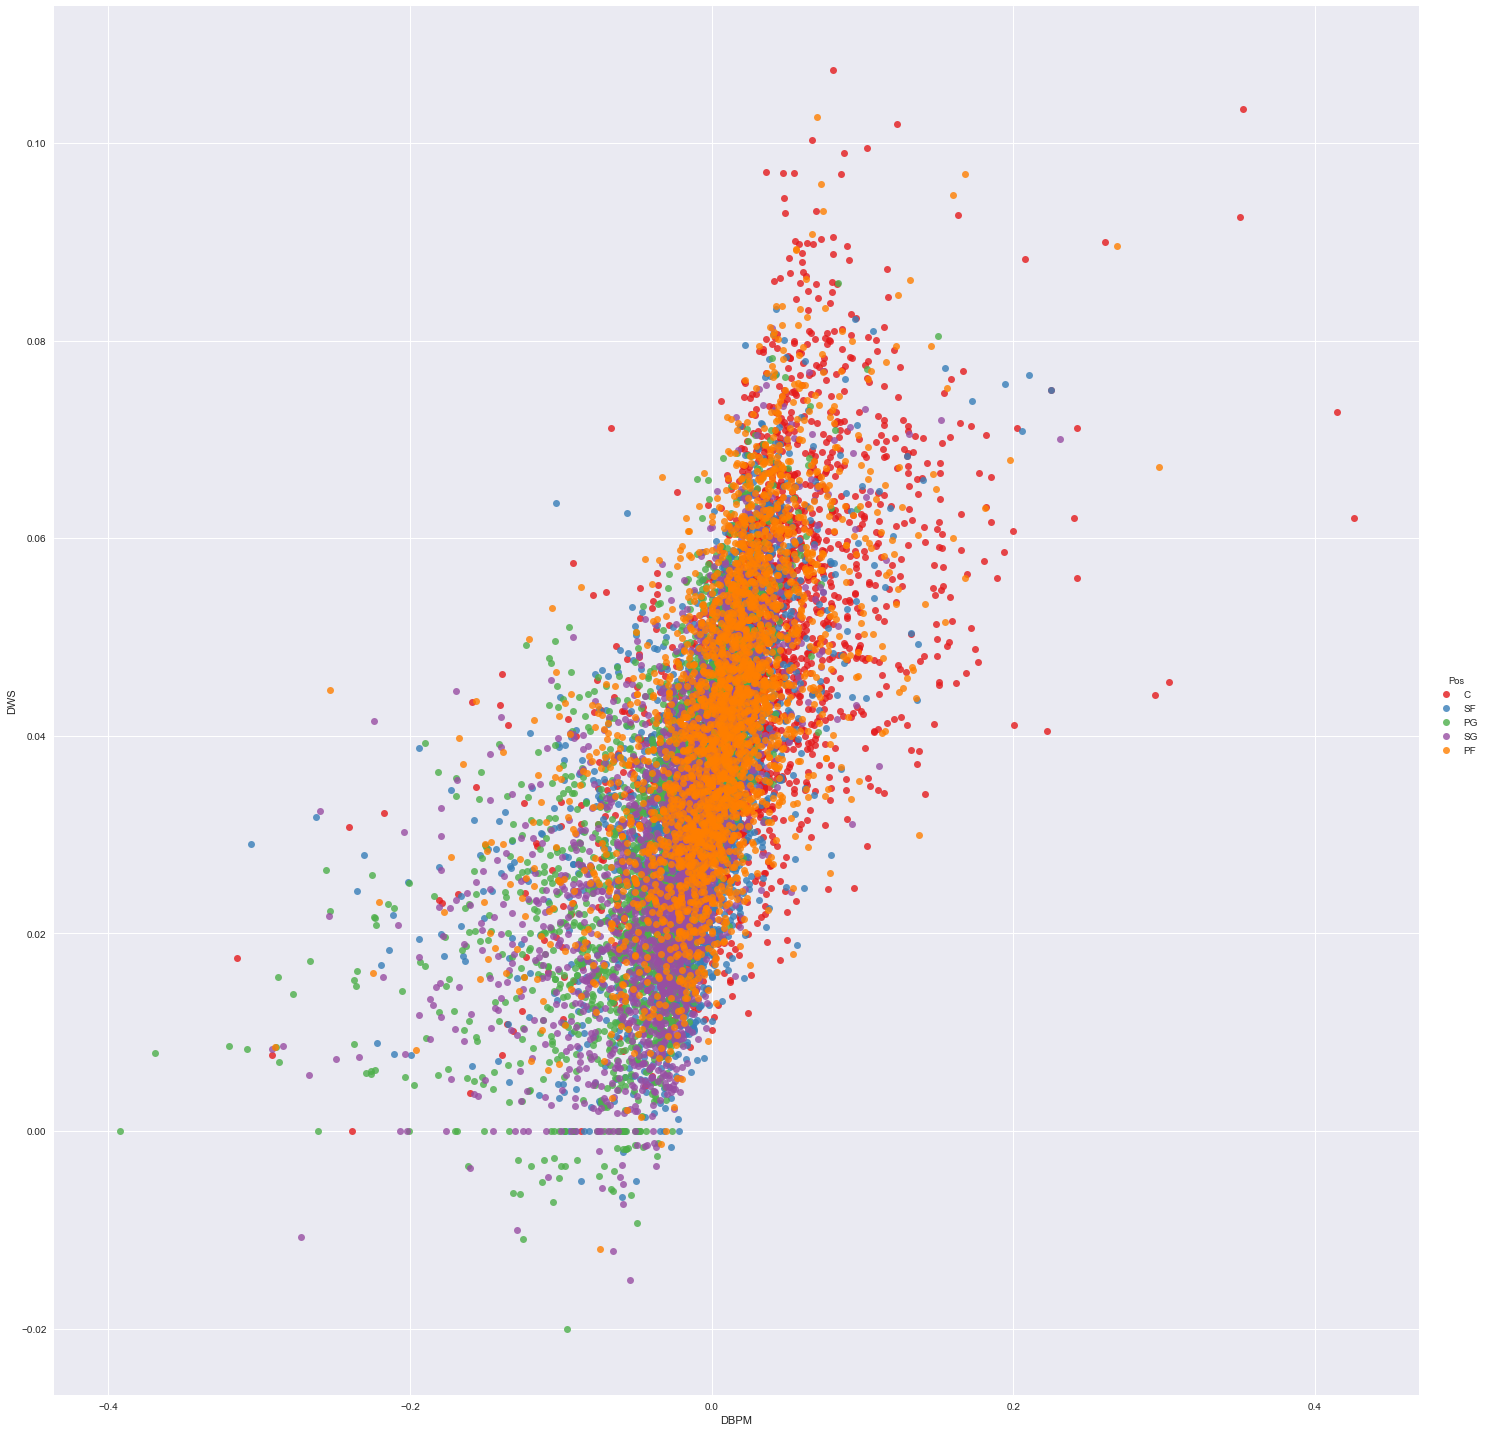

In [232]:
sns.lmplot( x="DBPM", y="DWS",size=20, data=data, fit_reg=False, hue="Pos", legend=True)

### Divide the datasets into 4 sets, each is corroesponding to one time period
    pre 90s - from 1978 to 1990
    _90s - from 1991 to 2000
    _00s - from 2001 to 2010
    _10s - from 2011 to 2017

In [321]:
pre90s = data[~(data['Year']>1989)]
_90s = data[~(data['Year']<1990) & ~(data['Year']>1999)]
_00s = data[~(data['Year']<2000) & ~(data['Year']>2009)]
_10s = data[~(data['Year']<2010)]

#### Number of defensive rebound for player distribution in each time period

/Users/yidingweng/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


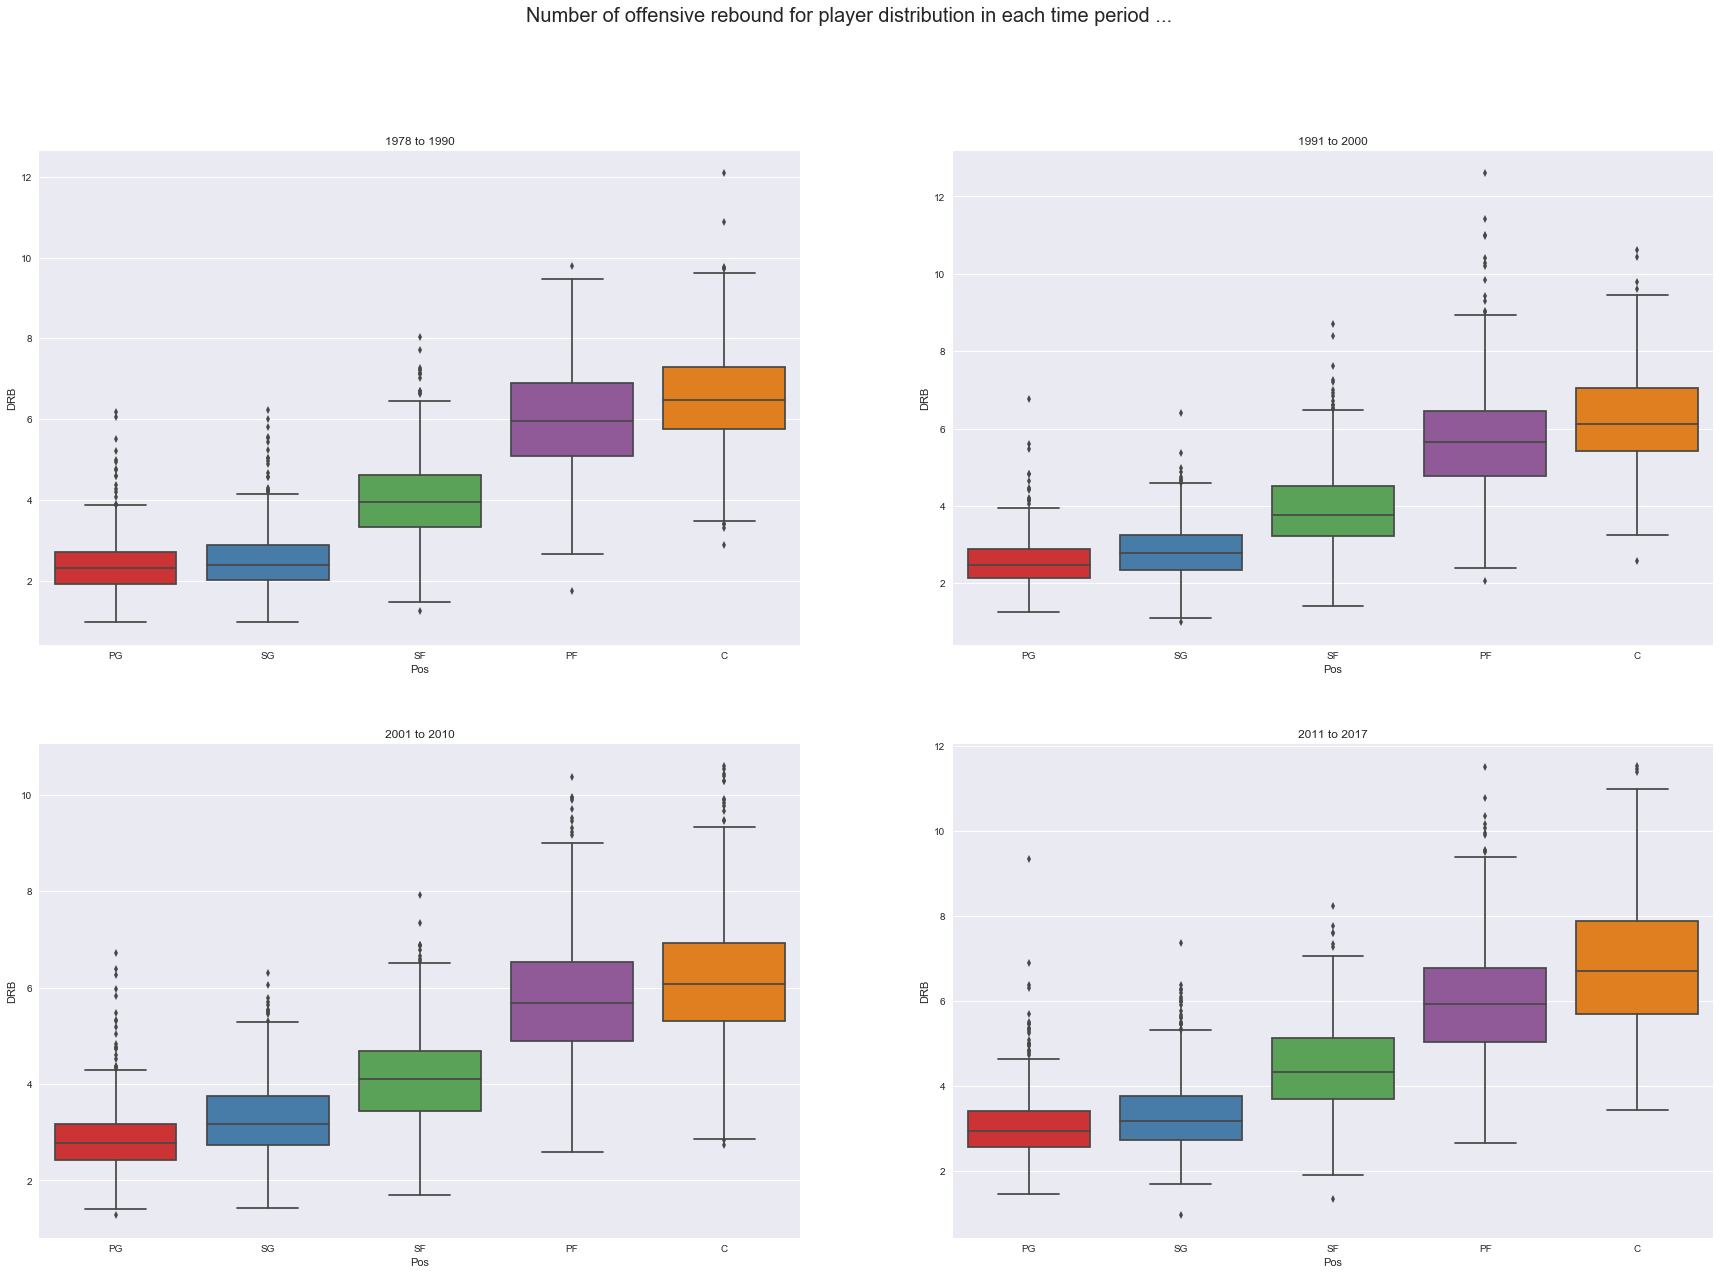

In [346]:
fig, axarr = plt.subplots(2, 2, figsize=(30, 20))
fig.suptitle('Number of offensive rebound for player distribution in each time period ...',fontsize=20)
sns.boxplot(x="Pos", y="DRB", data=pre90s,order=["PG", "SG", "SF","PF","C"],ax=axarr[0][0])
axarr[0, 0].set_title('1978 to 1990')
sns.boxplot(x="Pos", y="DRB", data=_90s,order=["PG", "SG", "SF","PF","C"],ax=axarr[0][1])
axarr[0, 1].set_title('1991 to 2000')
sns.boxplot(x="Pos", y="DRB", data=_00s,order=["PG", "SG", "SF","PF","C"],ax=axarr[1][0])
axarr[1, 0].set_title('2001 to 2010')
sns.boxplot(x="Pos", y="DRB", data=_10s,order=["PG", "SG", "SF","PF","C"],ax=axarr[1][1])
axarr[1, 1].set_title('2011 to 2017')

/Users/yidingweng/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


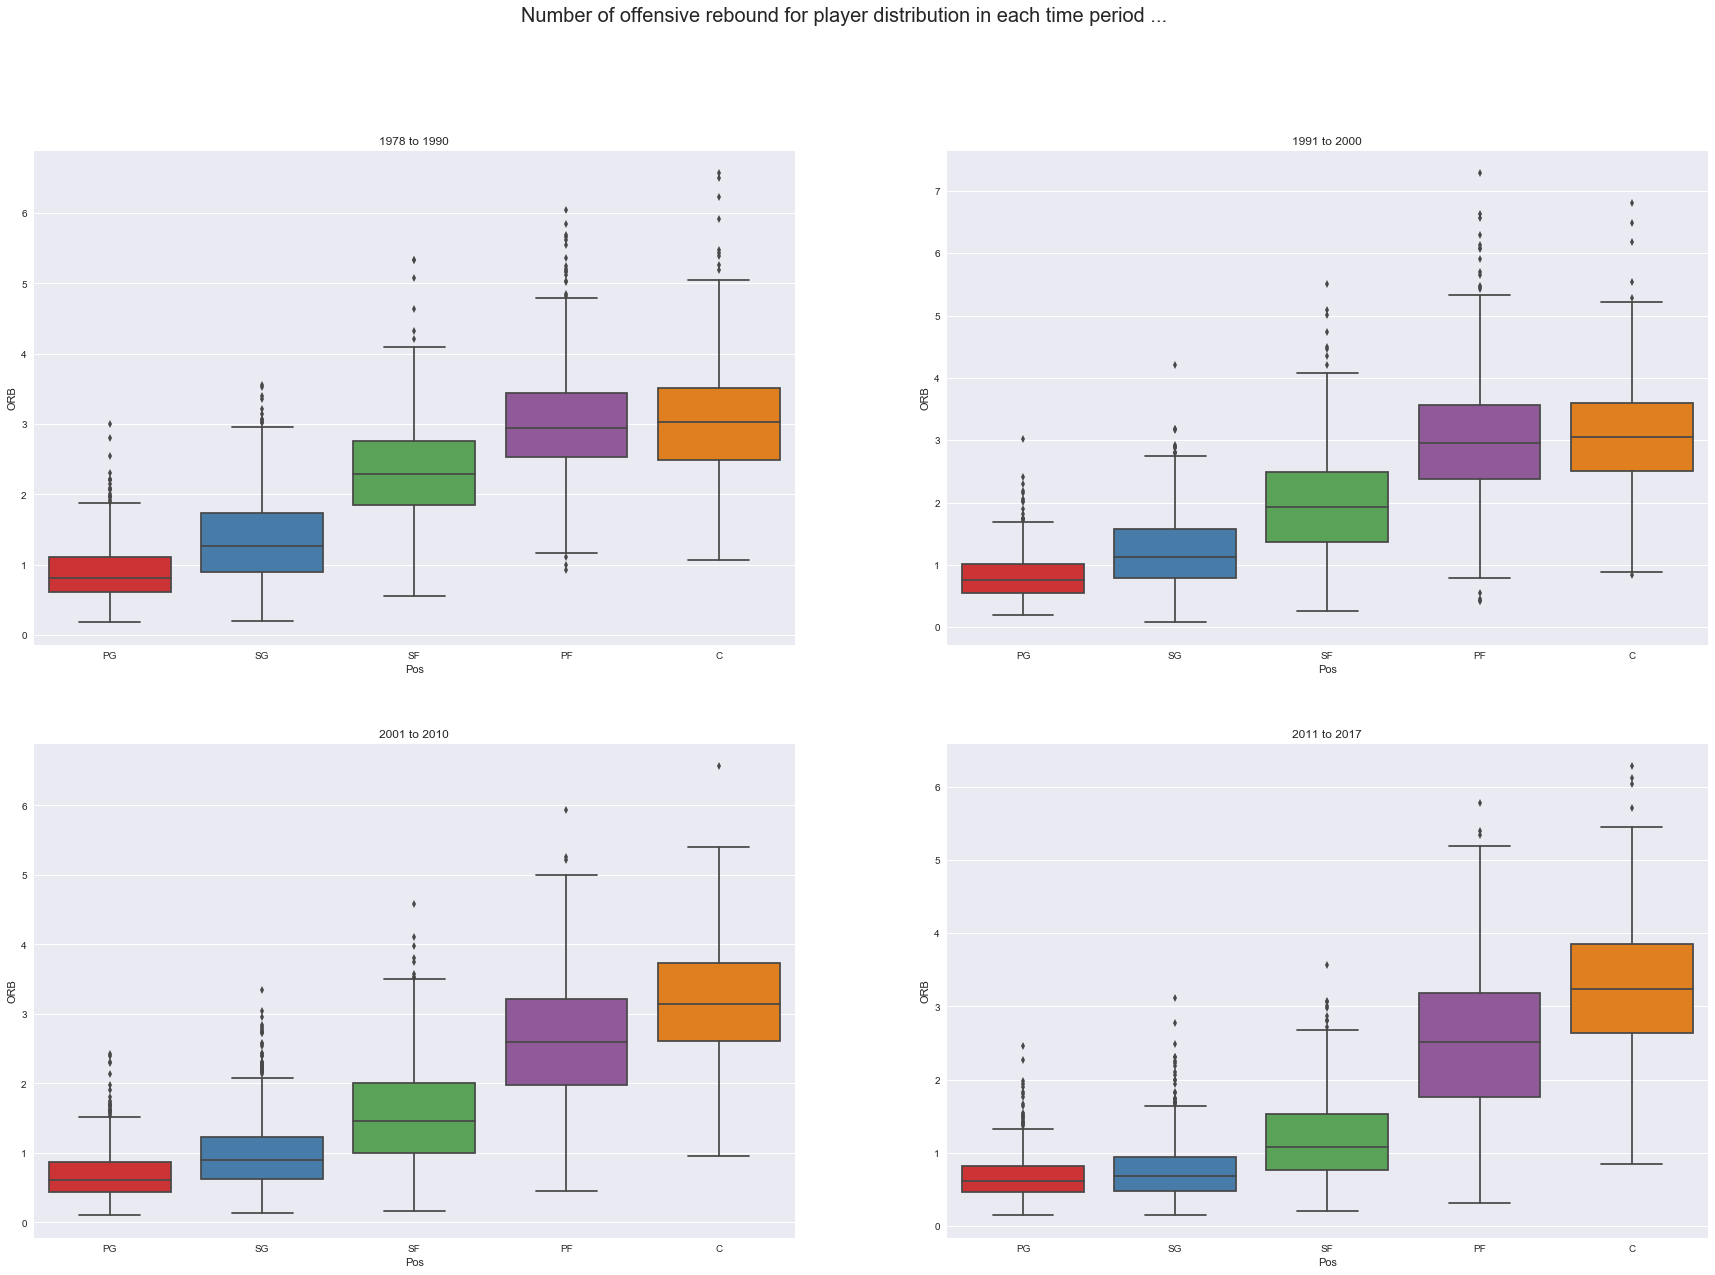

In [344]:
fig, axarr = plt.subplots(2, 2, figsize=(30, 20))
fig.suptitle('Number of offensive rebound for player distribution in each time period ...',fontsize=20)
sns.boxplot(x="Pos", y="ORB", data=pre90s,order=["PG", "SG", "SF","PF","C"],ax=axarr[0][0])
axarr[0, 0].set_title('1978 to 1990')
sns.boxplot(x="Pos", y="ORB", data=_90s,order=["PG", "SG", "SF","PF","C"],ax=axarr[0][1])
axarr[0, 1].set_title('1991 to 2000')
sns.boxplot(x="Pos", y="ORB", data=_00s,order=["PG", "SG", "SF","PF","C"],ax=axarr[1][0])
axarr[1, 0].set_title('2001 to 2010')
sns.boxplot(x="Pos", y="ORB", data=_10s,order=["PG", "SG", "SF","PF","C"],ax=axarr[1][1])
axarr[1, 1].set_title('2011 to 2017')

/Users/yidingweng/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


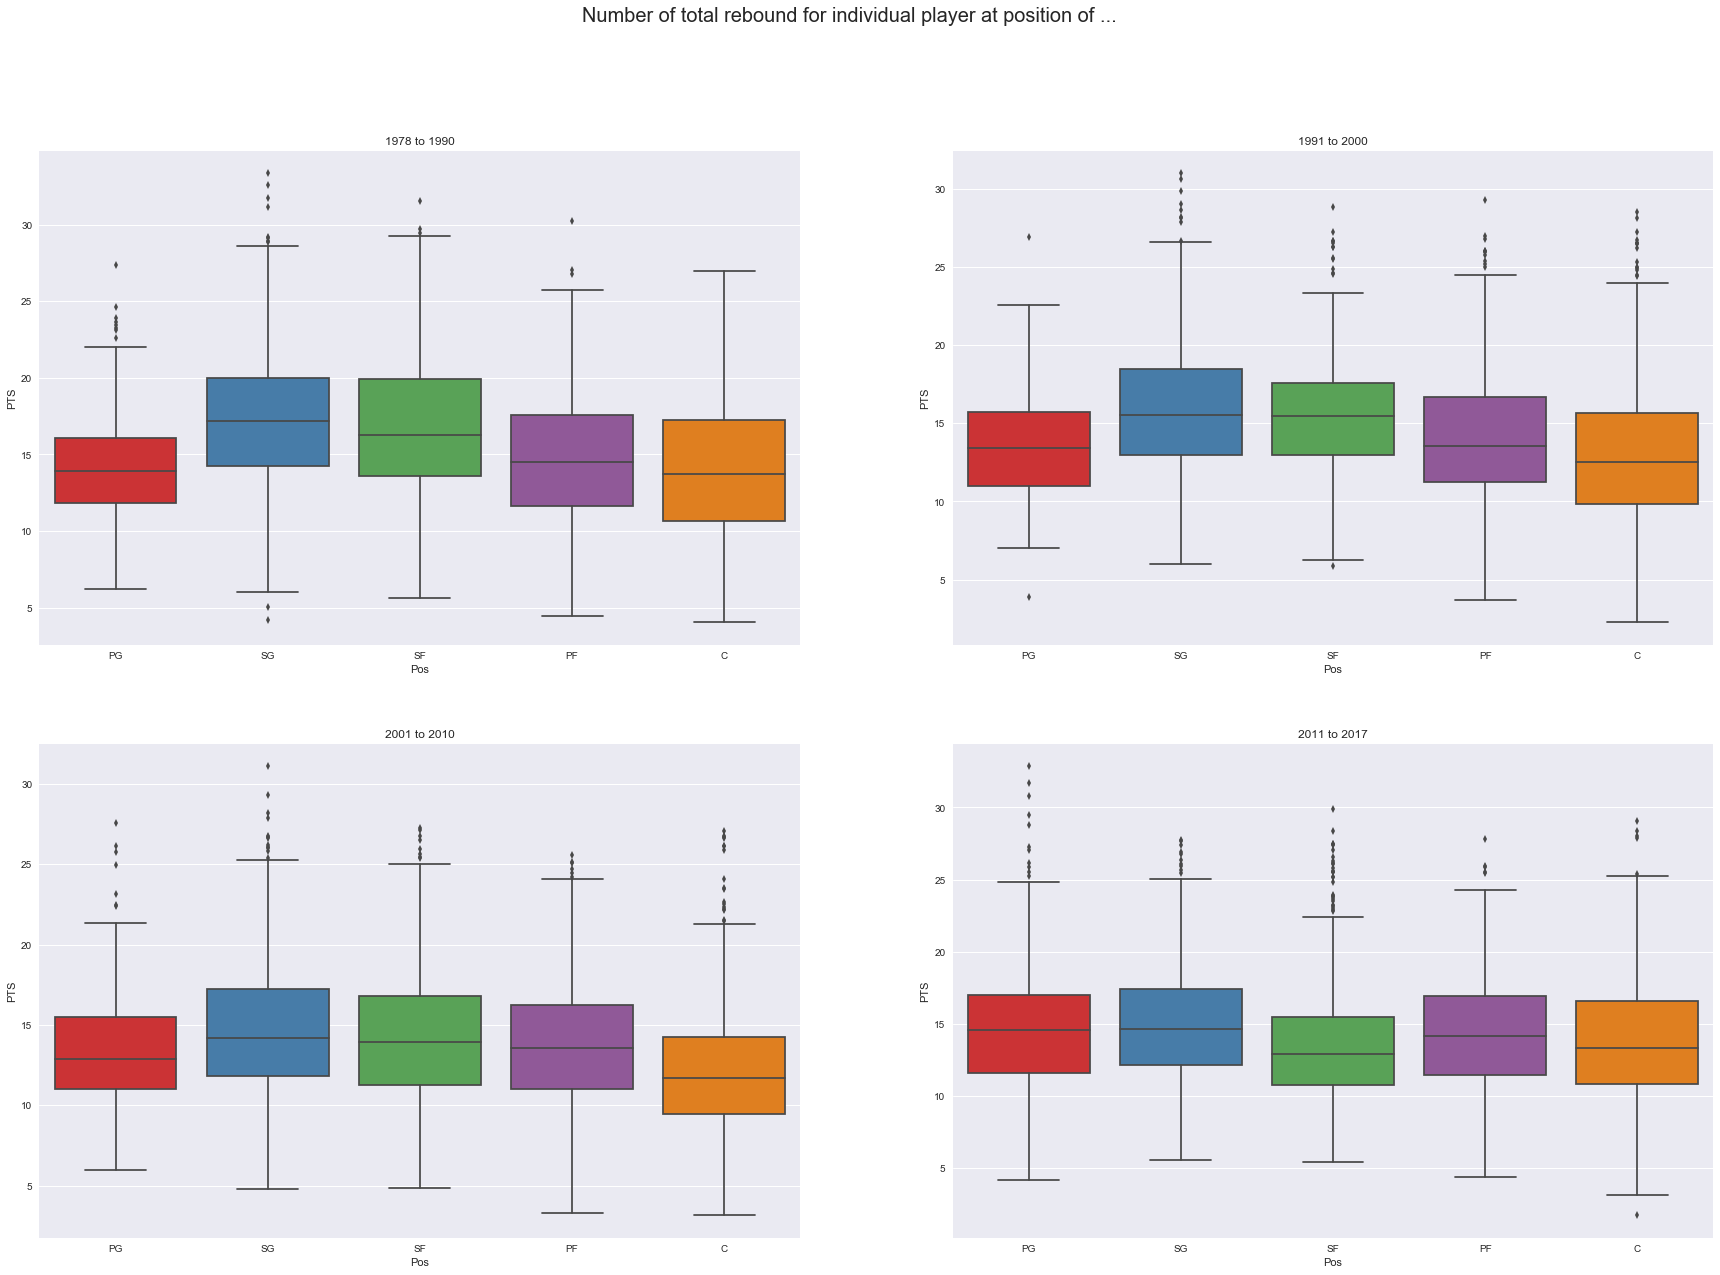

In [343]:
fig, axarr = plt.subplots(2, 2, figsize=(30, 20))
fig.suptitle('Number of total rebound for individual player at position of ...',fontsize=20)
sns.boxplot(x="Pos", y="PTS", data=pre90s,order=["PG", "SG", "SF","PF","C"],ax=axarr[0][0])
axarr[0, 0].set_title('1978 to 1990')
sns.boxplot(x="Pos", y="PTS", data=_90s,order=["PG", "SG", "SF","PF","C"],ax=axarr[0][1])
axarr[0, 1].set_title('1991 to 2000')
sns.boxplot(x="Pos", y="PTS", data=_00s,order=["PG", "SG", "SF","PF","C"],ax=axarr[1][0])
axarr[1, 0].set_title('2001 to 2010')
sns.boxplot(x="Pos", y="PTS", data=_10s,order=["PG", "SG", "SF","PF","C"],ax=axarr[1][1])
axarr[1, 1].set_title('2011 to 2017')

In [239]:
import matplotlib.style
import matplotlib as mpl
import matplotlib.pyplot as plt
# to change default colormap
plt.rcParams["image.cmap"] = "Set1"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)

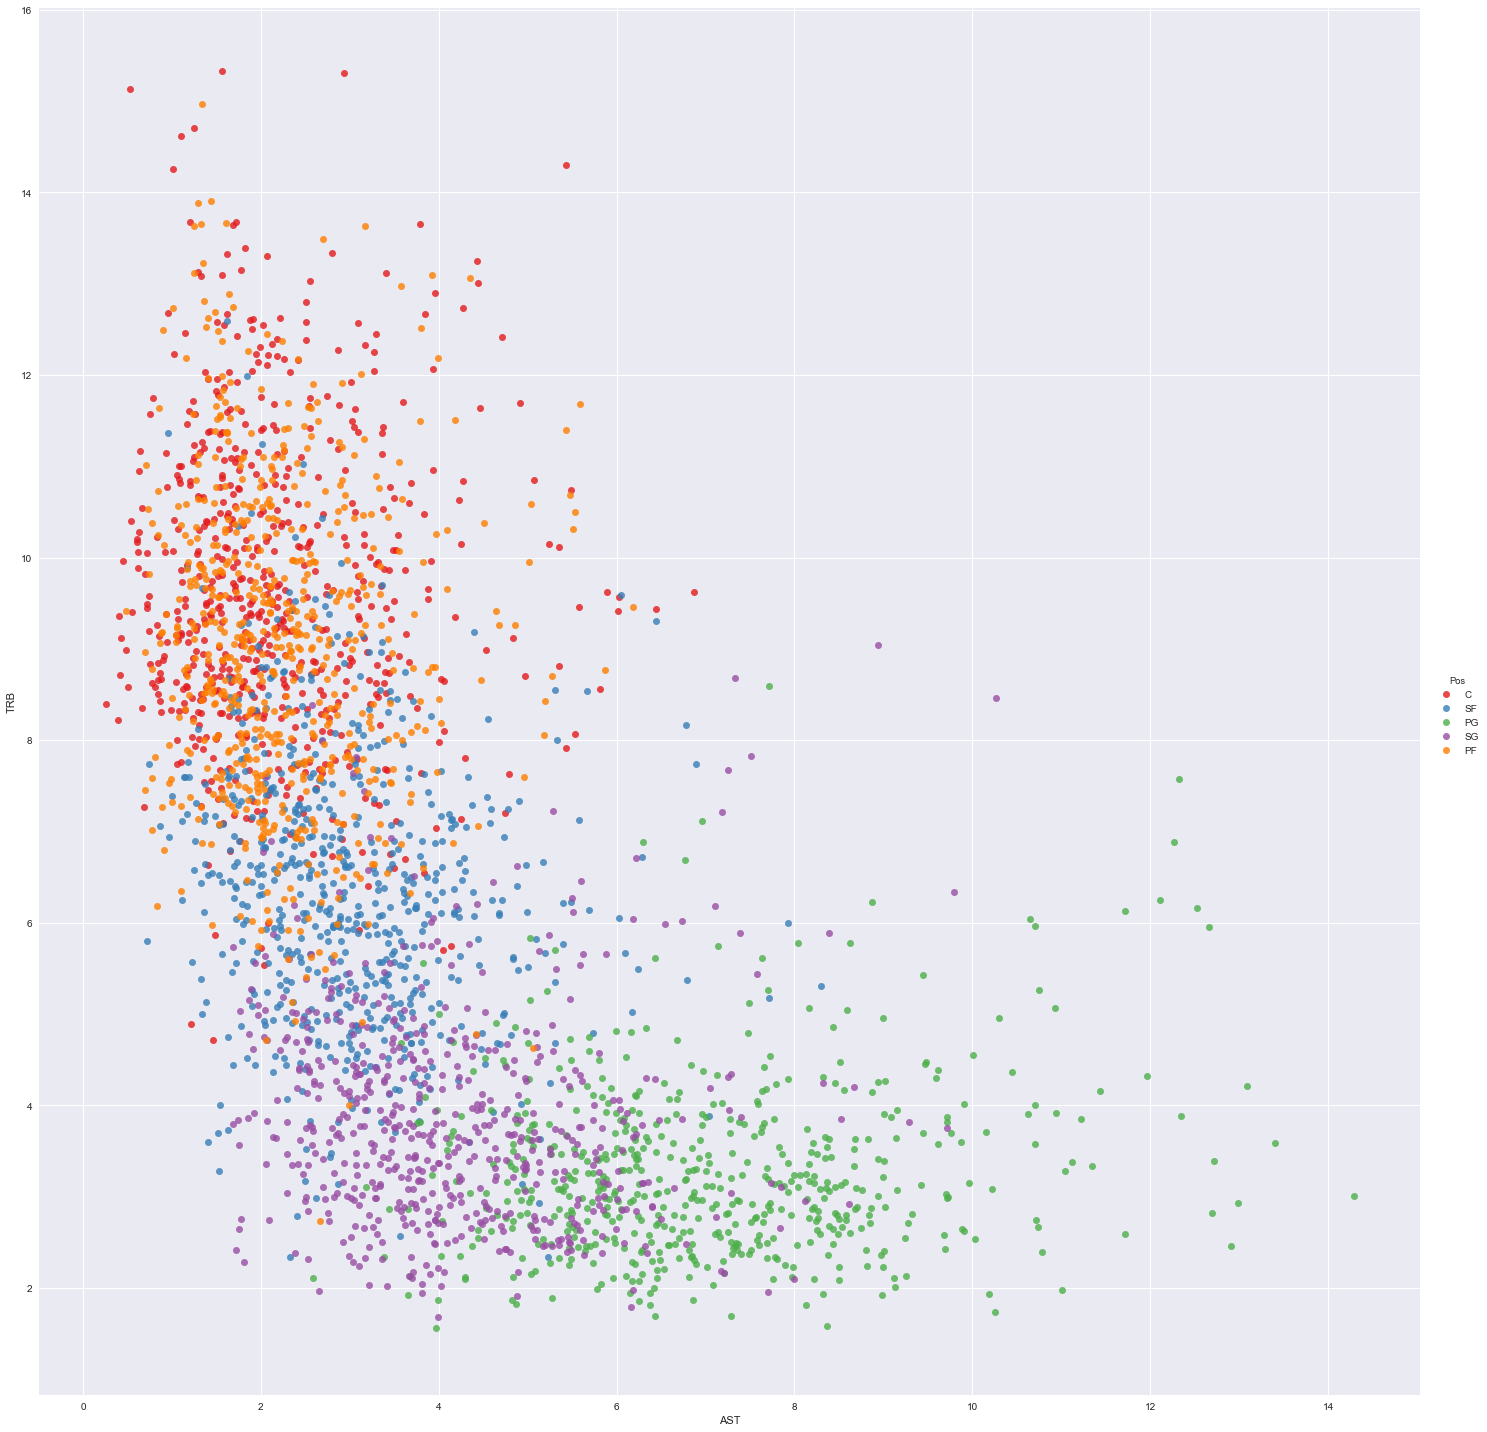

In [308]:
sns.lmplot( x="AST", y="TRB", data=pre90s, size=20, fit_reg=False, hue="Pos", legend=True)

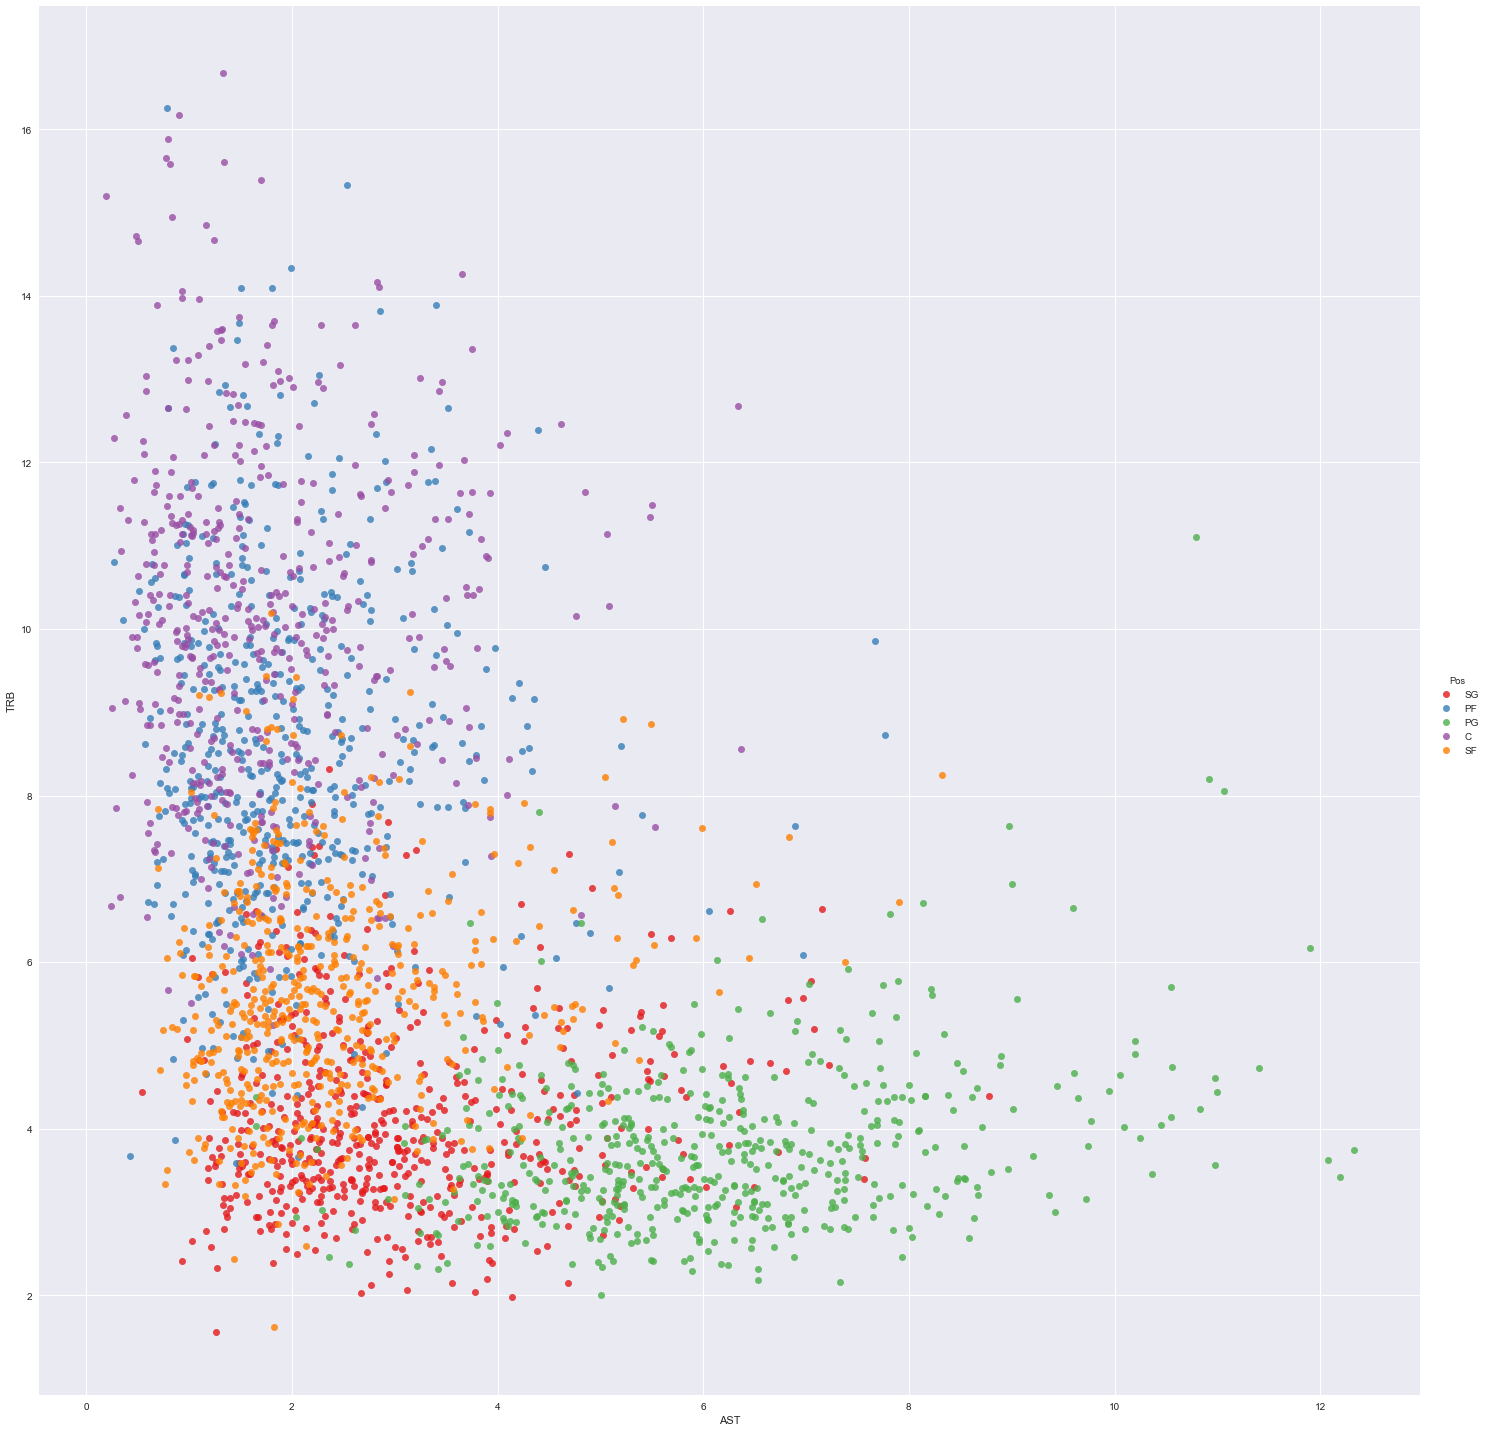

In [307]:
sns.lmplot( x="AST", y="TRB", data=_10s,size=20,fit_reg=False, hue="Pos", legend=True)